# Colab for midterm-ds by Team Data Kratos

Authors:
> **P**rokopenko Irina
>
> **A**khmerov Ruslan
>
> **B**azin Anton
>
> **G**rechin Alexey


**Roles:**

Prokopenko Irina:
*   Предварительная очистка файлов (конвертация pdf-файла в csv-формат)
*   Дополнительное редактирование файлов (tab-файла)
*   Анализ файлов в QlikView с целью выявления проблем 
*   Проверка гипотез
---

Akhmerov Ruslan:
* Преобразование файлов (yaml -> xml -> csv, xlsx -> csv)
* Унификация имён колонок в файлах
* Соединение данных из файлов в одну таблицу
* Проверка гипотез

---

Grechin Alexey:
* Преобразование файлов (xml -> csv)
* Первичный анализ файлов с целью выявления проблем в QlikView 
* Тестовая загрузка файлов в QlikView
* Тестовая загрузка файлов в базу данных

---

Bazin Anton:
*   Предварительная очистка файлов (конвертация tab-файла в csv-формат)
*   Организация работы в Google Colab
*   Вторая очистка файлов (изменение колонок)
*   Проверка гипотез



# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
# !hostname

Проверка монтирования диска (должен быть уже монтирован), вывод содержимого рабочей директории:

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

os.listdir()

Mounted at /content/drive


['.config', 'drive', 'sample_data']

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Read data

In [4]:
dataframes = {file: pd.read_csv('/content/drive/MyDrive/spy-ds/' + file) for file in os.listdir('/content/drive/MyDrive/spy-ds')}


Один из файлов имеет разделитель ';', удалить его и считать снова

In [5]:
del dataframes['BoardingData.csv']

In [6]:
dataframes['BoardingData.csv'] = pd.read_csv('/content/drive/MyDrive/spy-ds/BoardingData.csv', sep=';', na_values='Not presented')

Ещё туда попал сам ноутбук, удалим его

In [7]:
del dataframes['midterm-analysis.ipynb']

# Унификация названий полей датафреймов

Для слияния датафреймов и получения информации из разных источников требуется унифицировать именование полей с одинаковым смыслом.

Для этого нужно создать словари, отображающие старые названия на новые

In [8]:
# вывести названия колонок в датафрейме
list(dataframes['PointzAggregator-AirlinesData.csv'])

['%Key_card_E00E8E5BB1D673B6',
 '%Key_user_B75D73B83490C0F0',
 'activities/type',
 'activity/type',
 'Arrival',
 'bonusprogramm',
 'cards/type',
 'Code',
 'Date',
 'Departure',
 'Fare',
 'first',
 'last',
 'number',
 'uid']

In [9]:
# 'PointzAggregator-AirlinesData.csv'

pointz_aggregator_rename_dict = {
    'Arrival': 'ArrivalAirport',
    'bonusprogramm': 'BonusProgramm',
    'Code': 'BookingCode',
    'Date': 'DepartureDate',
    'Departure': 'DepartureAirport',
    'number': 'CardNumber',
    'first': 'PassengerFirstName',
    'last': 'PassengerLastName'
}

In [10]:
for k, v in dataframes.items():
  print(f'{k}: {list(v)}')

frequent_flyers_forum_profiles.csv: ['%Key_Forum_x0020_Profiles_187C458A6AADEC83', 'Arrival/Airport', 'Arrival/City', 'Arrival/Country', 'Codeshare', 'Date', 'Departure/Airport', 'Departure/City', 'Departure/Country', 'First_x0020_Name', 'Flight', 'Last_x0020_Name', 'NickName', 'Number', 'programm', 'Sex', 'Status']
PointzAggregator-AirlinesData.csv: ['%Key_card_E00E8E5BB1D673B6', '%Key_user_B75D73B83490C0F0', 'activities/type', 'activity/type', 'Arrival', 'bonusprogramm', 'cards/type', 'Code', 'Date', 'Departure', 'Fare', 'first', 'last', 'number', 'uid']
skyteam_exchange.csv: ['%Key_dates_36216B4A36FC6D51', '%Key_flight_C9754733A3EF9EB4', 'card', 'CLASS', 'code', 'date', 'FARE', 'FROM', 'STATUS', 'TO']
YourBoardingPassDotAero.csv: ['sex', 'name', 'sequence', 'letter', 'flight', 'departure_city', 'arrival_city', 'gate', 'departure_airport', 'arrival_airport', 'date', 'time', 'airline', 'comment', 'seat', 'pnr', 'e-ticket']
convertedSirena.csv: ['Unnamed: 0', 'PaxName', 'PaxBirthDate',

In [11]:
frequent_flyers_forum_profiles_rename_dict = {
    'Date': 'DepartureDate',
    'Codeshare': 'CodeShare',
    'Flight': 'FlightCode',
    'Departure/City': 'DepartureCity',
    'Departure/Airport': 'DepartureAirport',
    'Departure/Country': 'DepartureCountry',
    'Arrival/City': 'ArrivalCity',
    'Arrival/Airport': 'ArrivalAirport',
    'Arrival/Country': 'ArrivalCountry',
    'Status': 'LoyalityProgrammStatus',
    'programm': 'LoyalityProgramm',
    'Number': 'LoyalityProgrammNumber',
    'Sex': 'PassengerSex',
    'First_x0020_Name': 'PassengerFirstName',
    'Last_x0020_Name': 'PassengerLastName'
}

In [12]:
skyteam_exchange_rename_dict = {
    'card': 'CardNumber',
    'CLASS': 'TravelClass',
    'FARE': 'Fare',
    'code': 'FlightCode',
    'FROM': 'DepartureAirport',
    'STATUS': 'FlightStatus',
    'TO': 'ArrivalAirport',
    'date': 'DepartureDate'
}

In [13]:
converted_sirena_rename_dict = {
    'PaxName': 'PassengerName',
    'PaxBirthDate': 'PassengerBirthDate',
    'DepartDate': 'DepartureDate',
    'DepartTime': 'DepartureTime',
    'From': 'DepartureAirport',
    'Dest': 'ArrivalAirport',
    'e-Ticket': 'TicketNumber',
    'TravelDoc': 'PassengerDocument',
    'TrvCls': 'TravelClass',
    'Code': 'BookingCode',
    'Flight': 'FlightNumber'
}

In [14]:
your_boarding_pass_rename_dict = {
    'sex': 'PassengerSex',
    'name': 'PassengerName',
    'letter': 'TravelClass',
    'flight': 'FlightCode',
    'departure_city': 'DepartureCity',
    'arrival_city': 'ArrivalCity',
    'departure_airport': 'DepartureAirport',
    'arrival_airport': 'ArrivalAirport',
    'date': 'DepartureDate',
    'time': 'DepartureTime',
    'pnr': 'BookingCode',
    'e-ticket': 'TicketNumber'
}

In [15]:
boarding_data_rename_dict = {
    'FlightDate': 'DepartureDate',
    'FlightTime': 'DepartureTime',
    'Destination': 'ArrivalCity',
    'Baggage': 'BaggageStatus'
}

In [16]:
# переименовать всё сразу

dataframes_rename_mapping = {
    'frequent_flyers_forum_profiles.csv': frequent_flyers_forum_profiles_rename_dict,
    'PointzAggregator-AirlinesData.csv': pointz_aggregator_rename_dict,
    'skyteam_exchange.csv': skyteam_exchange_rename_dict,
    'convertedSirena.csv': converted_sirena_rename_dict,
    'YourBoardingPassDotAero.csv': your_boarding_pass_rename_dict,
    'BoardingData.csv': boarding_data_rename_dict 
}

for k, v in dataframes_rename_mapping.items():
  dataframes[k] = dataframes[k].rename(columns=v)

Authors:
> **P**rokopenko Irina
>
> **A**khmerov Ruslan
>
> **B**azin Anton
>
> **G**rechin Alexey


# Check load (OPTIONAL)

Проверка успешного чтения файлов - вывод ключей (имена файлов) и вывод первых 5 строк всех файлов

In [17]:
list(dataframes.keys())

['frequent_flyers_forum_profiles.csv',
 'PointzAggregator-AirlinesData.csv',
 'skyteam_exchange.csv',
 'YourBoardingPassDotAero.csv',
 'convertedSirena.csv',
 'BoardingData.csv']

In [18]:
dataframes['PointzAggregator-AirlinesData.csv'].head()

,%Key_card_E00E8E5BB1D673B6,%Key_user_B75D73B83490C0F0,activities/type,activity/type,ArrivalAirport,BonusProgramm,cards/type,BookingCode,DepartureDate,DepartureAirport,Fare,PassengerFirstName,PassengerLastName,CardNumber,uid
0,8.0,1,Airlines,Flight,BSD,Flying Blue,Airlines,MU9706,2017-10-26,PEK,YSTNYV,IAROMIR,ZVEREV,FB 171388778,613142142
1,8.0,1,Airlines,Flight,SZX,Flying Blue,Airlines,KE827,2017-08-06,rea,YGRPZT,IAROMIR,ZVEREV,FB 171388778,613142142
2,34.0,27,Airlines,Flight,ATL,Korean Air SKYPASS,Airlines,DL5058,2017-09-11,CHA,YRSTKY,VITALINA,KOROVINA,KE 696768759,103197717
3,34.0,27,Airlines,Flight,HNL,Korean Air SKYPASS,Airlines,DL837,2017-09-13,ATL,YGRPNG,VITALINA,KOROVINA,KE 696768759,103197717
4,34.0,27,Airlines,Flight,HNL,Korean Air SKYPASS,Airlines,KE1,2017-04-01,rea,PRSTRU,VITALINA,KOROVINA,KE 696768759,103197717


In [19]:
dataframes['frequent_flyers_forum_profiles.csv'].head()

,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalAirport,ArrivalCity,ArrivalCountry,CodeShare,DepartureDate,DepartureAirport,DepartureCity,DepartureCountry,PassengerFirstName,FlightCode,PassengerLastName,NickName,LoyalityProgrammNumber,LoyalityProgramm,PassengerSex,LoyalityProgrammStatus
0,1,ATL,Atlanta GA,United States of,False,2017-04-01,BHM,Birmingham AI,United States of,NaN,DL2596,NaN,FrequentFlyer0,484697244.0,DT,Male,Elite+
1,1,ATL,Atlanta GA,United States of,False,2017-04-01,BHM,Birmingham AI,United States of,NaN,DL2596,NaN,FrequentFlyer0,889215424.0,KE,Male,Basic
2,1,ATL,Atlanta GA,United States of,False,2017-06-10,ILM,Wilmington NC,United States of,NaN,DL5032,NaN,FrequentFlyer0,484697244.0,DT,Male,Elite+
3,1,ATL,Atlanta GA,United States of,False,2017-06-10,ILM,Wilmington NC,United States of,NaN,DL5032,NaN,FrequentFlyer0,889215424.0,KE,Male,Basic
4,1,ATL,Atlanta GA,United States of,False,2017-07-14,SHV,Shreveport LA,United States of,NaN,DL3339,NaN,FrequentFlyer0,484697244.0,DT,Male,Elite+


In [20]:
dataframes['skyteam_exchange.csv'].head()

,%Key_dates_36216B4A36FC6D51,%Key_flight_C9754733A3EF9EB4,CardNumber,TravelClass,FlightCode,DepartureDate,Fare,DepartureAirport,FlightStatus,ArrivalAirport
0,1,4,FB 520518073,Y,AF1145,2017-01-01,YRSTFN,SVO,LANDED,CDG
1,1,14,FB 18427809,Y,AF1844,2017-01-01,YGRPZR,SVO,LANDED,CDG
2,1,24,KE 993927664,Y,AF4855,2017-01-01,YRSTJQ,SVO,LANDED,CDG
3,1,34,SU 789402704,Y,AF4901,2017-01-01,YGRPAT,SVO,LANDED,CDG
4,1,44,KE 352734424,Y,AZ545,2017-01-01,YFLXKO,SVO,LANDED,FCO


In [21]:
dataframes['YourBoardingPassDotAero.csv'].head()

,PassengerSex,PassengerName,sequence,TravelClass,FlightCode,DepartureCity,ArrivalCity,gate,DepartureAirport,ArrivalAirport,DepartureDate,DepartureTime,airline,comment,seat,BookingCode,TicketNumber
0,MRS,LIDIYA ZHDANOVA,32.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,DYELAO,7.100247e+15
1,MR,SVIATOSLAV SOKOLOV,50.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,JWARRD,7.608904e+15
2,MR,SVIATOSLAV SUKHANOV,32.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,SETJJH,5.272576e+14
3,MR,DENIS ZELENIN,77.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,MZZNJI,3.696048e+15
4,MRS,OSTROVSKAYA IRINA,87.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,NJNNPC,7.470610e+15


In [22]:
dataframes['convertedSirena.csv'].head()

,Unnamed: 0,PassengerName,PassengerBirthDate,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,FlightNumber,CodeSh,DepartureAirport,ArrivalAirport,BookingCode,TicketNumber,PassengerDocument,Seat,Meal,TravelClass,Fare,Baggage,PaxAdditionalInfo,CardNumber,AgentInfo
0,0,ОЗЕРОВ ИЛЬДАР ДАНИИЛОВИЧ,1999-05-15,2017-05-30,00:05,2017-05-30,08:05,SU1306,NO,SVO,OVB,ZBQSPY,7360415302044672,9375 053270,NaN,NaN,J,JGRPGN,0PC,S,FF#SU 38116280,Go2See
1,1,КОЛОСОВ САМИР ТАМЕРЛАНОВИЧ,NaN,2017-12-27,02:15,2017-12-27,04:40,SU1323,NO,MMK,SVO,MHPBBX,7398421117936516,2244 645520,NaN,KSML,Y,YRSTUQ,NaN,9,FF#FB 284903754,NaN
2,2,ИГНАТОВА СНЕЖАНА КОНСТАНТИНОВНА,NaN,2017-09-19,06:40,2017-09-19,07:45,SU1481,NO,KJA,SVO,REDLVB,5174973140468001,8115 961316,NaN,NaN,Y,YSTNJL,NaN,F,NaN,KupiBilet
3,3,ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,1999-05-02,2017-03-18,22:10,2017-03-19,01:05,SU1180,NO,SVO,VOG,NSJNGQ,5274206497242737,98 6865148,NaN,NaN,J,JFLXLS,0PC,#,FF#FB 884556993,Travelgenio
4,4,НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,1990-12-26,2017-03-18,22:10,2017-03-19,01:05,SU1180,NO,SVO,VOG,VWNYGF,6247422701565929,4396 926588,NaN,NaN,Y,YFLXPG,NaN,NaN,FF#SU 183142068,OZON.travel


In [23]:
dataframes['BoardingData.csv'].head()

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,BaggageStatus,DepartureDate,DepartureTime,FlightNumber,CodeShare,ArrivalCity
0,SAVELII,VIKTOROVICH,RUSANOV,Male,03/10/1983,2879 096860,FRNINO,6.625957e+15,Transit,2017-03-22,06:05,SU1369,Own,Moscow
1,LEV,MARKOVICH,ISAEV,Male,12/13/1975,1788 173211,NaN,1.643715e+15,Registered,2017-03-18,22:10,SU1180,Own,Volgograd
2,NIKOLAI,I.,NIKOLSKII,Male,12/26/1990,4396 926588,VWNYGF,6.247423e+15,Transit,2017-03-18,22:10,SU1180,Own,Volgograd
3,ANATOLII,PETROVICH,SHILOV,Male,05/24/1997,2595 919752,WQFFUE,NaN,Registered,2017-03-18,22:10,SU1180,Own,Volgograd
4,MIROSLAVA,VIACHESLAVOVNA,SEMENOVA,Female,01/31/1976,6775 516990,NaN,NaN,Registered,2017-03-12,11:45,SU6284,Own,Moscow


# Creating a table with all available data about passengers
> Joining tables with pandas as specified in the 'ER Diargam' drawing

In [24]:
def change_date(old_date):
  if old_date is not np.nan:
    chunks_lst = str(old_date).split('/', 2)
    return chunks_lst[2] + '-' + chunks_lst[0] + '-' + chunks_lst[1]
  return np.nan

In [25]:
dataframes['BoardingData.csv']['PassengerBirthDate'] = dataframes['BoardingData.csv']['PassengerBirthDate'].apply(change_date)

In [26]:
def merge_columns(dataframe, new_name):
  dataframe[new_name] = dataframe[new_name + '_x'].fillna(dataframe[new_name + '_y'])
  dataframe.drop(labels=[new_name + '_x', new_name + '_y'], axis=1, inplace=True)

In [27]:
def merge_table(dataframe, except_=None):
  columns_to_merge = list(map(lambda x: x[:-2], filter(lambda x: x.endswith('_x'), list(dataframe))))
  ex = except_ or []
  for column in columns_to_merge:
    if column in ex:
      continue
    merge_columns(dataframe, column)

В качестве уникального идентификатора пассажира было решено использовать паспорт, либо номер программы лояльности, если про паспорт пассажира ничего не известно. 

В первую очередь приведём номера паспортов пассажиров к числовому типу, чтобы избавиться от различий в его написании

In [28]:
dataframes['BoardingData.csv']['PassengerDocument'] = dataframes['BoardingData.csv']['PassengerDocument'].apply(
    lambda x: int(x.replace(' ', '')) if x is not None else x
)

In [29]:
dataframes['BoardingData.csv'].head()

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,BaggageStatus,DepartureDate,DepartureTime,FlightNumber,CodeShare,ArrivalCity
0,SAVELII,VIKTOROVICH,RUSANOV,Male,1983-03-10,2879096860,FRNINO,6.625957e+15,Transit,2017-03-22,06:05,SU1369,Own,Moscow
1,LEV,MARKOVICH,ISAEV,Male,1975-12-13,1788173211,NaN,1.643715e+15,Registered,2017-03-18,22:10,SU1180,Own,Volgograd
2,NIKOLAI,I.,NIKOLSKII,Male,1990-12-26,4396926588,VWNYGF,6.247423e+15,Transit,2017-03-18,22:10,SU1180,Own,Volgograd
3,ANATOLII,PETROVICH,SHILOV,Male,1997-05-24,2595919752,WQFFUE,NaN,Registered,2017-03-18,22:10,SU1180,Own,Volgograd
4,MIROSLAVA,VIACHESLAVOVNA,SEMENOVA,Female,1976-01-31,6775516990,NaN,NaN,Registered,2017-03-12,11:45,SU6284,Own,Moscow


In [30]:
dataframes['BoardingData.csv']['TicketNumber'] = dataframes['BoardingData.csv']['TicketNumber'].astype('Int64')

In [31]:
dataframes['convertedSirena.csv']['PassengerDocument'] = dataframes['convertedSirena.csv']['PassengerDocument'].apply(
    lambda x: int(x.replace(' ', '')) if x is not None else x
)

In [32]:
dataframes['convertedSirena.csv'].head()

,Unnamed: 0,PassengerName,PassengerBirthDate,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,FlightNumber,CodeSh,DepartureAirport,ArrivalAirport,BookingCode,TicketNumber,PassengerDocument,Seat,Meal,TravelClass,Fare,Baggage,PaxAdditionalInfo,CardNumber,AgentInfo
0,0,ОЗЕРОВ ИЛЬДАР ДАНИИЛОВИЧ,1999-05-15,2017-05-30,00:05,2017-05-30,08:05,SU1306,NO,SVO,OVB,ZBQSPY,7360415302044672,9375053270,NaN,NaN,J,JGRPGN,0PC,S,FF#SU 38116280,Go2See
1,1,КОЛОСОВ САМИР ТАМЕРЛАНОВИЧ,NaN,2017-12-27,02:15,2017-12-27,04:40,SU1323,NO,MMK,SVO,MHPBBX,7398421117936516,2244645520,NaN,KSML,Y,YRSTUQ,NaN,9,FF#FB 284903754,NaN
2,2,ИГНАТОВА СНЕЖАНА КОНСТАНТИНОВНА,NaN,2017-09-19,06:40,2017-09-19,07:45,SU1481,NO,KJA,SVO,REDLVB,5174973140468001,8115961316,NaN,NaN,Y,YSTNJL,NaN,F,NaN,KupiBilet
3,3,ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,1999-05-02,2017-03-18,22:10,2017-03-19,01:05,SU1180,NO,SVO,VOG,NSJNGQ,5274206497242737,986865148,NaN,NaN,J,JFLXLS,0PC,#,FF#FB 884556993,Travelgenio
4,4,НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,1990-12-26,2017-03-18,22:10,2017-03-19,01:05,SU1180,NO,SVO,VOG,VWNYGF,6247422701565929,4396926588,NaN,NaN,Y,YFLXPG,NaN,NaN,FF#SU 183142068,OZON.travel


In [33]:
gc.collect()

229

## 1. ConvertedSirena + BoardingData

In [34]:
cs = dataframes['convertedSirena.csv'].copy()
cs.dtypes

Unnamed: 0              int64
PassengerName          object
PassengerBirthDate     object
DepartureDate          object
DepartureTime          object
ArrivalDate            object
ArrivalTime            object
FlightNumber           object
CodeSh                 object
DepartureAirport       object
ArrivalAirport         object
BookingCode            object
TicketNumber           object
PassengerDocument       int64
Seat                  float64
Meal                   object
TravelClass            object
Fare                   object
Baggage                object
PaxAdditionalInfo      object
CardNumber             object
AgentInfo              object
dtype: object

Тут проблема с номерами билетов

In [35]:
dataframes['convertedSirena.csv'][dataframes['convertedSirena.csv']['BookingCode'] == 'VUGNRD']

,Unnamed: 0,PassengerName,PassengerBirthDate,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,FlightNumber,CodeSh,DepartureAirport,ArrivalAirport,BookingCode,TicketNumber,PassengerDocument,Seat,Meal,TravelClass,Fare,Baggage,PaxAdditionalInfo,CardNumber,AgentInfo
133502,133502,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,1982-05-19,2017-02-19,12:10,2017-02-19,13:20,SU4606,YES,OHH,KHV,VUGNRD,"9,95952254316315E+015",2723331385,NaN,ORML,Y,YRSTGF,0PC,#,FF#FB 147226191,NaN


In [36]:
dataframes['BoardingData.csv'][dataframes['BoardingData.csv']['BookingCode'] == 'VUGNRD']

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,BaggageStatus,DepartureDate,DepartureTime,FlightNumber,CodeShare,ArrivalCity
132884,EMIL,RODIONOVICH,ERSHOV,Male,1982-05-19,2723331385,VUGNRD,9959522543163148,None,2017-02-19,12:10,SU4606,Operated,Khabarovsk


In [37]:
#Конвертируем номер билета к целочисленному типу, чтобы по нему можно было джойнить. 

#При этом пока не поправится TicketNumber у нас неизбежно будут дубликаты из-за потери точности

In [38]:
# ticket number from object to int

cs['TicketNumber'] = cs['TicketNumber'].str.strip()
cs['TicketNumber'] = cs['TicketNumber'].str.replace(',', '.')
cs['TicketNumber'] = cs['TicketNumber'].astype('float').astype('Int64')

# passenger document from int to Int64

cs.dtypes

Unnamed: 0              int64
PassengerName          object
PassengerBirthDate     object
DepartureDate          object
DepartureTime          object
ArrivalDate            object
ArrivalTime            object
FlightNumber           object
CodeSh                 object
DepartureAirport       object
ArrivalAirport         object
BookingCode            object
TicketNumber            Int64
PassengerDocument       int64
Seat                  float64
Meal                   object
TravelClass            object
Fare                   object
Baggage                object
PaxAdditionalInfo      object
CardNumber             object
AgentInfo              object
dtype: object

In [39]:
bd = dataframes['BoardingData.csv'].copy()
bd.dtypes

PassengerFirstName     object
PassengerSecondName    object
PassengerLastName      object
PassengerSex           object
PassengerBirthDate     object
PassengerDocument       int64
BookingCode            object
TicketNumber            Int64
BaggageStatus          object
DepartureDate          object
DepartureTime          object
FlightNumber           object
CodeShare              object
ArrivalCity            object
dtype: object

Перелёт описывается номером билета (TicketNumber) и бронирования (BookingCode). Проверим, есть ли строки с пропущенными в этих полях значениями:

In [40]:
bd['TicketNumber'].isnull().values.any()

True

In [41]:
bd['BookingCode'].isnull().values.any()

True

Раз есть такие строки, мержить надо будет по отдельности:
- сначала со всеми строками, в которых указан и TicketNumber, и BookingCode, сразу по трём колонкам (PassengerDocument, TicketNumber, BookingCode)
- затем со всеми строками, в которых указан TicketNumber, но нет BookingCode, по колонкам (PassengerDocument, TicketNumber)
- аналогично - со строками с BookingCode, но без TicketNumber, по (PassengerDocument, BookingCode)

In [42]:
bd['BookingCode'] = bd['BookingCode'].str.strip()
cs['BookingCode'] = cs['BookingCode'].str.strip()

In [43]:
bd_tn = bd[bd['BookingCode'].isna()].dropna(subset=['TicketNumber'])  # for TicketNumber joining only
bd_bc = bd[bd['TicketNumber'].isna()].dropna(subset=['BookingCode'])
bd_all = bd.dropna(subset=['TicketNumber', 'BookingCode'])

In [44]:
gc.collect()

63

In [45]:
bd[bd['BookingCode'] == 'VUGNRD']

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,BaggageStatus,DepartureDate,DepartureTime,FlightNumber,CodeShare,ArrivalCity
132884,EMIL,RODIONOVICH,ERSHOV,Male,1982-05-19,2723331385,VUGNRD,9959522543163148,None,2017-02-19,12:10,SU4606,Operated,Khabarovsk


In [46]:
gc.collect()

112

In [47]:
cs[cs['BookingCode'] == 'VUGNRD']

,Unnamed: 0,PassengerName,PassengerBirthDate,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,FlightNumber,CodeSh,DepartureAirport,ArrivalAirport,BookingCode,TicketNumber,PassengerDocument,Seat,Meal,TravelClass,Fare,Baggage,PaxAdditionalInfo,CardNumber,AgentInfo
133502,133502,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,1982-05-19,2017-02-19,12:10,2017-02-19,13:20,SU4606,YES,OHH,KHV,VUGNRD,9959522543163150,2723331385,NaN,ORML,Y,YRSTGF,0PC,#,FF#FB 147226191,NaN


In [48]:
passenger_data = cs.copy()
passenger_data = passenger_data.merge(bd_all, how='outer', on=['PassengerDocument', 'BookingCode', 'TicketNumber'])
merge_table(passenger_data)

In [49]:
passenger_data = passenger_data.merge(bd_tn, how='outer', on=['PassengerDocument', 'TicketNumber'])
merge_table(passenger_data)

In [50]:
passenger_data = pd.merge(passenger_data, bd_bc, how='outer', on=['PassengerDocument', 'BookingCode'])
merge_table(passenger_data)

In [51]:
passenger_data

,Unnamed: 0,PassengerName,ArrivalDate,ArrivalTime,CodeSh,DepartureAirport,ArrivalAirport,PassengerDocument,Seat,Meal,TravelClass,Fare,Baggage,PaxAdditionalInfo,CardNumber,AgentInfo,BookingCode,TicketNumber,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,BaggageStatus,CodeShare,ArrivalCity,PassengerBirthDate,DepartureDate,DepartureTime,FlightNumber
0,0.0,ОЗЕРОВ ИЛЬДАР ДАНИИЛОВИЧ,2017-05-30,08:05,NO,SVO,OVB,9375053270,NaN,NaN,J,JGRPGN,0PC,S,FF#SU 38116280,Go2See,ZBQSPY,7.360415e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-05-15,2017-05-30,00:05,SU1306
1,1.0,КОЛОСОВ САМИР ТАМЕРЛАНОВИЧ,2017-12-27,04:40,NO,MMK,SVO,2244645520,NaN,KSML,Y,YRSTUQ,NaN,9,FF#FB 284903754,NaN,MHPBBX,7.398421e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-27,02:15,SU1323
2,2.0,ИГНАТОВА СНЕЖАНА КОНСТАНТИНОВНА,2017-09-19,07:45,NO,KJA,SVO,8115961316,NaN,NaN,Y,YSTNJL,NaN,F,NaN,KupiBilet,REDLVB,5.174973e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-19,06:40,SU1481
3,3.0,ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,2017-03-19,01:05,NO,SVO,VOG,986865148,NaN,NaN,J,JFLXLS,0PC,#,FF#FB 884556993,Travelgenio,NSJNGQ,5.274206e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-05-02,2017-03-18,22:10,SU1180
4,4.0,НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,2017-03-19,01:05,NO,SVO,VOG,4396926588,NaN,NaN,Y,YFLXPG,NaN,NaN,FF#SU 183142068,OZON.travel,VWNYGF,6.247423e+15,NIKOLAI,I.,NIKOLSKII,Male,Transit,Own,Volgograd,1990-12-26,2017-03-18,22:10,SU1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3523256427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAXRAH,NaN,VALERIIA,E.,EMELIANOVA,Female,None,Own,Moscow,1994-11-30,2017-04-23,23:05,SU1205
222251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810546575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TBPGOQ,NaN,ARTEMII,S.,SHCHUKIN,Male,Delayed,Own,Moscow,1992-06-19,2017-10-09,12:45,SU1367
222252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5793140209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BQGRCZ,NaN,MARK,O.,MESHCHERIAKOV,Male,Transit,Own,Moscow,1977-04-25,2017-01-08,21:10,SU1337
222253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498385313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YKXKTU,NaN,VALERIIA,E.,KHUDIAKOVA,Female,Delayed,Own,Moscow,1991-08-24,2017-01-08,21:10,SU1337


In [52]:
passenger_data['TicketNumber'] = passenger_data['TicketNumber'].astype('Int64')

In [53]:
passenger_data[passenger_data['PassengerDocument'] == 2723331385]

,Unnamed: 0,PassengerName,ArrivalDate,ArrivalTime,CodeSh,DepartureAirport,ArrivalAirport,PassengerDocument,Seat,Meal,TravelClass,Fare,Baggage,PaxAdditionalInfo,CardNumber,AgentInfo,BookingCode,TicketNumber,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,BaggageStatus,CodeShare,ArrivalCity,PassengerBirthDate,DepartureDate,DepartureTime,FlightNumber
11691,11599.0,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,2017-10-14,13:20,YES,OHH,KHV,2723331385,NaN,HNML,Y,YRSTEH,NaN,F,NaN,Kiwi.com,MBSMYI,8257563552621546,EMIL,RODIONOVICH,ERSHOV,Male,Delayed,Operated,Khabarovsk,1982-05-19,2017-10-14,12:10,SU4606
22934,22723.0,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,2017-07-28,17:40,NO,PKC,KHV,2723331385,NaN,VGML,Y,YRSTUN,0PC,#,NaN,Tickets.ru,SWAFJV,557974261308880,EMIL,RODIONOVICH,ERSHOV,Male,None,Own,Khabarovsk,1982-05-19,2017-07-28,16:45,SU5685
33711,33409.0,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,2017-06-08,15:15,NO,KHV,PKC,2723331385,NaN,FPML,Y,YRSTKL,NaN,NaN,NaN,Aeroflot,RINIPN,6593619828050951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982-05-19,2017-06-08,10:30,SU5684
130707,129509.0,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,2017-09-26,13:20,YES,OHH,KHV,2723331385,NaN,NaN,Y,YFLXBE,0PC,F,NaN,eDreams,RZUJDD,7531245205748232,EMIL,RODIONOVICH,ERSHOV,Male,Registered,Operated,Khabarovsk,1982-05-19,2017-09-26,12:10,SU4606
134728,133502.0,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,2017-02-19,13:20,YES,OHH,KHV,2723331385,NaN,ORML,Y,YRSTGF,0PC,#,FF#FB 147226191,NaN,VUGNRD,9959522543163150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982-05-19,2017-02-19,12:10,SU4606
134729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2723331385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VUGNRD,9959522543163148,EMIL,RODIONOVICH,ERSHOV,Male,None,Operated,Khabarovsk,1982-05-19,2017-02-19,12:10,SU4606
148436,147077.0,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,2017-12-10,15:15,NO,VVO,UUS,2723331385,NaN,VLML,J,JGRPXX,0PC,6,FF#FB 147226191,Tickets.ru,VPGXHL,8851588608542018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-10,12:30,SU5606
166804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2723331385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HBCTUB,323387178877058,EMIL,R.,ERSHOV,Male,Registered,Operated,Okha,1982-05-19,2017-09-29,13:50,SU4606
206775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2723331385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NGZJZS,<NA>,EMIL,R.,ERSHOV,Male,Delayed,Operated,Okha,1982-05-19,2017-08-14,13:50,SU4606


Заполнение пропущенных значений:

In [54]:
columns_to_drop = ['PassengerFirstName', 'PassengerSecondName', 'PassengerLastName', 'Meal', 'PaxAdditionalInfo']
passenger_data.drop(labels=columns_to_drop, axis=1, inplace=True)

## 2. FrequentFlyers

In [55]:
passenger_data.CardNumber = passenger_data.CardNumber.apply(lambda x: x if x is np.nan else str(x)[3:])

In [56]:
gc.collect()

324

Теперь мержим frequent_flyers:

In [57]:
df_ff = dataframes['frequent_flyers_forum_profiles.csv'].copy()
df_ff

,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalAirport,ArrivalCity,ArrivalCountry,CodeShare,DepartureDate,DepartureAirport,DepartureCity,DepartureCountry,PassengerFirstName,FlightCode,PassengerLastName,NickName,LoyalityProgrammNumber,LoyalityProgramm,PassengerSex,LoyalityProgrammStatus
0,1,ATL,Atlanta GA,United States of,False,2017-04-01,BHM,Birmingham AI,United States of,NaN,DL2596,NaN,FrequentFlyer0,484697244.0,DT,Male,Elite+
1,1,ATL,Atlanta GA,United States of,False,2017-04-01,BHM,Birmingham AI,United States of,NaN,DL2596,NaN,FrequentFlyer0,889215424.0,KE,Male,Basic
2,1,ATL,Atlanta GA,United States of,False,2017-06-10,ILM,Wilmington NC,United States of,NaN,DL5032,NaN,FrequentFlyer0,484697244.0,DT,Male,Elite+
3,1,ATL,Atlanta GA,United States of,False,2017-06-10,ILM,Wilmington NC,United States of,NaN,DL5032,NaN,FrequentFlyer0,889215424.0,KE,Male,Basic
4,1,ATL,Atlanta GA,United States of,False,2017-07-14,SHV,Shreveport LA,United States of,NaN,DL3339,NaN,FrequentFlyer0,484697244.0,DT,Male,Elite+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931937,16595641,PRG,Prague,Czech Republic,False,2017-08-12,SVO,Moscow,Russian Federation,AYDAR,SU2014,ISAEV,FrequentFlyer99999,NaN,NaN,Male,NaN
1931938,16595641,SLC,Salt Lake City UT,United States of,False,2017-11-30,JFK,New York NY,United States of,AYDAR,DL1428,ISAEV,FrequentFlyer99999,NaN,NaN,Male,NaN
1931939,16595641,SVO,Moscow,Russian Federation,False,2017-03-04,OVB,Novosibirsk,Russian Federation,AYDAR,SU1463,ISAEV,FrequentFlyer99999,NaN,NaN,Male,NaN
1931940,16595641,SVO,Moscow,Russian Federation,False,2017-06-02,OVB,Novosibirsk,Russian Federation,AYDAR,SU1463,ISAEV,FrequentFlyer99999,NaN,NaN,Male,NaN


В данном случае соединение с `passenger_data` будет происходить по колонкам (DepartureDate, FlightNumber, LoyalityProgrammNumber).  

Для начала преобразуем данные к формату в `passenger_data`

In [58]:
df_ff['CardNumber'] = (
    df_ff.LoyalityProgramm.apply(
        lambda x: str(x) if x is not np.nan else ''
    ) + ' ' + df_ff.LoyalityProgrammNumber.apply(
        lambda x: '' if str(x) == 'nan' else str(int(x))
    )
).apply(lambda x: np.nan if x == ' ' else x)

In [59]:
df_ff.drop(['LoyalityProgrammNumber', 'LoyalityProgramm'], axis=1,  inplace=True)

In [60]:
df_ff = df_ff.rename(columns={'FlightCode': 'FlightNumber'})
df_ff

,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalAirport,ArrivalCity,ArrivalCountry,CodeShare,DepartureDate,DepartureAirport,DepartureCity,DepartureCountry,PassengerFirstName,FlightNumber,PassengerLastName,NickName,PassengerSex,LoyalityProgrammStatus,CardNumber
0,1,ATL,Atlanta GA,United States of,False,2017-04-01,BHM,Birmingham AI,United States of,NaN,DL2596,NaN,FrequentFlyer0,Male,Elite+,DT 484697244
1,1,ATL,Atlanta GA,United States of,False,2017-04-01,BHM,Birmingham AI,United States of,NaN,DL2596,NaN,FrequentFlyer0,Male,Basic,KE 889215424
2,1,ATL,Atlanta GA,United States of,False,2017-06-10,ILM,Wilmington NC,United States of,NaN,DL5032,NaN,FrequentFlyer0,Male,Elite+,DT 484697244
3,1,ATL,Atlanta GA,United States of,False,2017-06-10,ILM,Wilmington NC,United States of,NaN,DL5032,NaN,FrequentFlyer0,Male,Basic,KE 889215424
4,1,ATL,Atlanta GA,United States of,False,2017-07-14,SHV,Shreveport LA,United States of,NaN,DL3339,NaN,FrequentFlyer0,Male,Elite+,DT 484697244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931937,16595641,PRG,Prague,Czech Republic,False,2017-08-12,SVO,Moscow,Russian Federation,AYDAR,SU2014,ISAEV,FrequentFlyer99999,Male,NaN,NaN
1931938,16595641,SLC,Salt Lake City UT,United States of,False,2017-11-30,JFK,New York NY,United States of,AYDAR,DL1428,ISAEV,FrequentFlyer99999,Male,NaN,NaN
1931939,16595641,SVO,Moscow,Russian Federation,False,2017-03-04,OVB,Novosibirsk,Russian Federation,AYDAR,SU1463,ISAEV,FrequentFlyer99999,Male,NaN,NaN
1931940,16595641,SVO,Moscow,Russian Federation,False,2017-06-02,OVB,Novosibirsk,Russian Federation,AYDAR,SU1463,ISAEV,FrequentFlyer99999,Male,NaN,NaN


In [61]:
# passenger_data.drop_duplicates().merge(df_ff, how='outer', on=['CardNumber', 'FlightNumber'])
# df_ff.dropna(subset=['CardNumber'])
# pd.merge(passenger_data, df_ff.dropna(subset=['CardNumber']), how='outer', on=['CardNumber', 'FlightNumber'])

Перед соединением по убедимся, что данные представлены в обоих датафреймах в совместимом формате:

In [62]:
df_ff.dtypes

%Key_Forum_x0020_Profiles_187C458A6AADEC83     int64
ArrivalAirport                                object
ArrivalCity                                   object
ArrivalCountry                                object
CodeShare                                       bool
DepartureDate                                 object
DepartureAirport                              object
DepartureCity                                 object
DepartureCountry                              object
PassengerFirstName                            object
FlightNumber                                  object
PassengerLastName                             object
NickName                                      object
PassengerSex                                  object
LoyalityProgrammStatus                        object
CardNumber                                    object
dtype: object

In [63]:
df_ff['DepartureDate'].isnull().values.any(), passenger_data['DepartureDate'].isnull().values.any()

(False, False)

In [64]:
df_ff['CardNumber'].isnull().values.any(), passenger_data['CardNumber'].isnull().values.any()

(True, True)

Так как номер карты лояльности представлен не во всех строках, в соединении справа будут участвовать только те строки, в которых указан CardNumber.

Также чтобы pandas сам не превратил номера паспортов во float, надо их привести к Int64

In [65]:
passenger_data['PassengerDocument'] = passenger_data['PassengerDocument'].astype('Int64')

In [66]:
gc.collect()

0

In [67]:
passenger_data = passenger_data.merge(df_ff.dropna(subset=['CardNumber']), how='outer', on=['CardNumber', 'FlightNumber', 'DepartureDate'])

In [68]:
merge_table(passenger_data)
passenger_data.head()

,Unnamed: 0,PassengerName,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,TravelClass,Fare,Baggage,CardNumber,AgentInfo,BookingCode,TicketNumber,BaggageStatus,PassengerBirthDate,DepartureDate,DepartureTime,FlightNumber,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCity,DepartureCountry,PassengerFirstName,PassengerLastName,NickName,LoyalityProgrammStatus,DepartureAirport,ArrivalAirport,PassengerSex,CodeShare,ArrivalCity
0,0.0,ОЗЕРОВ ИЛЬДАР ДАНИИЛОВИЧ,2017-05-30,08:05,NO,9375053270,NaN,J,JGRPGN,0PC,SU 38116280,Go2See,ZBQSPY,7360415302044672,NaN,1999-05-15,2017-05-30,00:05,SU1306,14143485.0,Russian Federation,Moscow,Russian Federation,IL'DAR,OZEROV,FrequentFlyer85276,Elite+,SVO,OVB,Male,False,Novosibirsk
1,1.0,КОЛОСОВ САМИР ТАМЕРЛАНОВИЧ,2017-12-27,04:40,NO,2244645520,NaN,Y,YRSTUQ,NaN,FB 284903754,NaN,MHPBBX,7398421117936516,NaN,NaN,2017-12-27,02:15,SU1323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MMK,SVO,NaN,NaN,NaN
2,2.0,ИГНАТОВА СНЕЖАНА КОНСТАНТИНОВНА,2017-09-19,07:45,NO,8115961316,NaN,Y,YSTNJL,NaN,NaN,KupiBilet,REDLVB,5174973140468001,NaN,NaN,2017-09-19,06:40,SU1481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJA,SVO,NaN,NaN,NaN
3,3.0,ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,2017-03-19,01:05,NO,986865148,NaN,J,JFLXLS,0PC,FB 884556993,Travelgenio,NSJNGQ,5274206497242737,NaN,1999-05-02,2017-03-18,22:10,SU1180,1469141.0,Russian Federation,Moscow,Russian Federation,PLATON,ZHAROV,FrequentFlyer8738,Basic,SVO,VOG,Male,False,Volgograd
4,4.0,НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,2017-03-19,01:05,NO,4396926588,NaN,Y,YFLXPG,NaN,SU 183142068,OZON.travel,VWNYGF,6247422701565929,Transit,1990-12-26,2017-03-18,22:10,SU1180,16349721.0,Russian Federation,Moscow,Russian Federation,NIKOLAY,NIKOL'SKIY,FrequentFlyer98543,Elite+,SVO,VOG,Male,Own,Volgograd


In [69]:
passenger_data[['CardNumber', 'PassengerDocument']]

,CardNumber,PassengerDocument
0,SU 38116280,9375053270
1,FB 284903754,2244645520
2,NaN,8115961316
3,FB 884556993,986865148
4,SU 183142068,4396926588
...,...,...
1934827,DT 702680548,<NA>
1934828,FB 183116620,<NA>
1934829,KE 275536799,<NA>
1934830,SU 449778932,<NA>


In [70]:
passenger_data['PassengerDocument'] = passenger_data['PassengerDocument'].astype('Int64')

In [71]:
passenger_data[passenger_data['PassengerDocument'] == 7304691329]

,Unnamed: 0,PassengerName,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,TravelClass,Fare,Baggage,CardNumber,AgentInfo,BookingCode,TicketNumber,BaggageStatus,PassengerBirthDate,DepartureDate,DepartureTime,FlightNumber,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCity,DepartureCountry,PassengerFirstName,PassengerLastName,NickName,LoyalityProgrammStatus,DepartureAirport,ArrivalAirport,PassengerSex,CodeShare,ArrivalCity
86795,64364.0,БОЧАРОВ АДЕЛЬ МАРСЕЛЕВИЧ,2017-06-26,07:55,NO,7304691329,NaN,Y,YFLXQZ,NaN,DT 702680548,OneTwoTrip,XYJCZS,8562415544572575,NaN,NaN,2017-06-26,07:00,SU1185,16595425.0,Russian Federation,Volgograd,Russian Federation,NaN,NaN,FrequentFlyer99996,Elite,VOG,SVO,Male,False,Moscow


In [72]:
passenger_data[passenger_data['CardNumber'] == 'DT 702680548']

# ужен groupwise ffill

,Unnamed: 0,PassengerName,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,TravelClass,Fare,Baggage,CardNumber,AgentInfo,BookingCode,TicketNumber,BaggageStatus,PassengerBirthDate,DepartureDate,DepartureTime,FlightNumber,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCity,DepartureCountry,PassengerFirstName,PassengerLastName,NickName,LoyalityProgrammStatus,DepartureAirport,ArrivalAirport,PassengerSex,CodeShare,ArrivalCity
86795,64364.0,БОЧАРОВ АДЕЛЬ МАРСЕЛЕВИЧ,2017-06-26,07:55,NO,7304691329,NaN,Y,YFLXQZ,NaN,DT 702680548,OneTwoTrip,XYJCZS,8562415544572575,NaN,NaN,2017-06-26,07:00,SU1185,16595425.0,Russian Federation,Volgograd,Russian Federation,NaN,NaN,FrequentFlyer99996,Elite,VOG,SVO,Male,False,Moscow
1934772,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,DT 702680548,NaN,NaN,<NA>,NaN,NaN,2017-07-06,NaN,KL1876,16595425.0,Netherlands,Stuttgart,Germany,NaN,NaN,FrequentFlyer99996,Elite,STR,AMS,Male,False,Amsterdam
1934776,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,DT 702680548,NaN,NaN,<NA>,NaN,NaN,2017-05-04,NaN,OK792,16595425.0,Hungary,Prague,Czech Republic,NaN,NaN,FrequentFlyer99996,Elite,PRG,BUD,Male,False,Budapest
1934780,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,DT 702680548,NaN,NaN,<NA>,NaN,NaN,2017-03-01,NaN,SU6454,16595425.0,Russian,Orenburg,Russian Federation,NaN,NaN,FrequentFlyer99996,Elite,REN,LED,Male,False,Saint Petersburg
1934784,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,DT 702680548,NaN,NaN,<NA>,NaN,NaN,2017-03-04,NaN,SU6619,16595425.0,United Kingdom,Saint Petersburg,Russian,NaN,NaN,FrequentFlyer99996,Elite,LED,LGW,Male,False,London
1934788,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,DT 702680548,NaN,NaN,<NA>,NaN,NaN,2017-08-13,NaN,CI154,16595425.0,Japan,Taipei,Taiwan,NaN,NaN,FrequentFlyer99996,Elite,TPE,NGO,Male,False,Nagoya
1934792,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,DT 702680548,NaN,NaN,<NA>,NaN,NaN,2017-09-06,NaN,CZ6101,16595425.0,China,Shenyang,China,NaN,NaN,FrequentFlyer99996,Elite,SHE,PEK,Male,False,Beijing
1934796,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,DT 702680548,NaN,NaN,<NA>,NaN,NaN,2017-12-19,NaN,MU5155,16595425.0,China,Shanghai,China,NaN,NaN,FrequentFlyer99996,Elite,SHA,PEK,Male,False,Beijing
1934800,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,DT 702680548,NaN,NaN,<NA>,NaN,NaN,2017-03-07,NaN,OK4659,16595425.0,Czech Republic,London,United Kingdom,NaN,NaN,FrequentFlyer99996,Elite,LGW,PRG,Male,True,Prague
1934804,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,DT 702680548,NaN,NaN,<NA>,NaN,NaN,2017-10-27,NaN,MU5118,16595425.0,China,Beijing,China,NaN,NaN,FrequentFlyer99996,Elite,PEK,SHA,Male,False,Shanghai


In [73]:
passenger_data['PassengerDocument'] = passenger_data[['PassengerDocument', 'CardNumber']] \
    .sort_values(by=['PassengerDocument'], ascending=False) \
    .groupby('CardNumber').ffill()

## 3. YourBoardingPassDotAero


In [74]:
df_yb = dataframes['YourBoardingPassDotAero.csv']

def mr_sex(x):
  if x == 'MRS':
    return 'Female'
  elif x == 'MR':
    return 'Male'
  return x

df_yb.PassengerSex = df_yb.PassengerSex.apply(mr_sex)
df_yb.head()

,PassengerSex,PassengerName,sequence,TravelClass,FlightCode,DepartureCity,ArrivalCity,gate,DepartureAirport,ArrivalAirport,DepartureDate,DepartureTime,airline,comment,seat,BookingCode,TicketNumber
0,Female,LIDIYA ZHDANOVA,32.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,DYELAO,7.100247e+15
1,Male,SVIATOSLAV SOKOLOV,50.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,JWARRD,7.608904e+15
2,Male,SVIATOSLAV SUKHANOV,32.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,SETJJH,5.272576e+14
3,Male,DENIS ZELENIN,77.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,MZZNJI,3.696048e+15
4,Female,OSTROVSKAYA IRINA,87.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,NJNNPC,7.470610e+15


In [75]:
df_yb = df_yb.dropna(how='all')
df_yb['TicketNumber'] = df_yb['TicketNumber'].astype('int').astype('Int64')
df_yb.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerSex,PassengerName,sequence,TravelClass,FlightCode,DepartureCity,ArrivalCity,gate,DepartureAirport,ArrivalAirport,DepartureDate,DepartureTime,airline,comment,seat,BookingCode,TicketNumber
0,Female,LIDIYA ZHDANOVA,32.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,DYELAO,7100246988860481
1,Male,SVIATOSLAV SOKOLOV,50.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,JWARRD,7608904175905333
2,Male,SVIATOSLAV SUKHANOV,32.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,SETJJH,527257587351371
3,Male,DENIS ZELENIN,77.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,MZZNJI,3696048365585673
4,Female,OSTROVSKAYA IRINA,87.0,Y,SU5436,VLADIVOSTOK,SEOUL,GATE,VVO,REA,2017-01-01,11:25,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,NJNNPC,7470610229847683


In [76]:
df_yb = df_yb.rename(columns={'FlightCode': 'FlightNumber'})

In [77]:
gc.collect()

125

In [78]:
passenger_data = pd.merge(passenger_data, df_yb, on=['TicketNumber'], how='inner')
merge_table(passenger_data)
passenger_data

,Unnamed: 0,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,Fare,Baggage,CardNumber,AgentInfo,TicketNumber,BaggageStatus,PassengerBirthDate,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCountry,PassengerFirstName,PassengerLastName,NickName,LoyalityProgrammStatus,CodeShare,sequence,gate,airline,comment,seat,PassengerName,TravelClass,BookingCode,DepartureDate,DepartureTime,FlightNumber,DepartureCity,DepartureAirport,ArrivalAirport,PassengerSex,ArrivalCity
0,3.0,2017-03-19,01:05,NO,986865148,NaN,JFLXLS,0PC,FB 884556993,Travelgenio,5274206497242737,NaN,1999-05-02,1469141.0,Russian Federation,Russian Federation,PLATON,ZHAROV,FrequentFlyer8738,Basic,False,21.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,J,NSJNGQ,2017-03-18,22:10,SU1180,Moscow,SVO,VOG,Male,Volgograd
1,4.0,2017-03-19,01:05,NO,4396926588,NaN,YFLXPG,NaN,SU 183142068,OZON.travel,6247422701565929,Transit,1990-12-26,16349721.0,Russian Federation,Russian Federation,NIKOLAY,NIKOL'SKIY,FrequentFlyer98543,Elite+,Own,89.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,Y,VWNYGF,2017-03-18,22:10,SU1180,Moscow,SVO,VOG,Male,Volgograd
2,9.0,2017-07-29,15:45,NO,78271703,NaN,YGRPPP,1PC,NaN,Aeroflot,2264717979478322,Registered,1995-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own,51.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,БАРСУКОВ САМИР ГОРДЕЕВИЧ,Y,WGKZTB,2017-07-29,14:15,SU1281,KAZAN,KZN,SVO,Male,Moscow
3,10.0,2017-04-07,08:55,NO,595142701,NaN,YGRPJC,0PC,NaN,Go2See,8366391494374150,Registered,1980-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own,42.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,РОЖКОВ РАМИЛЬ ЭМИЛЬЕВИЧ,Y,POFVPI,2017-04-07,00:15,SU1482,MOSCOW,SVO,KJA,Male,Krasnoyarsk
4,21.0,2017-10-20,18:45,NO,8280465896,NaN,YRSTNB,NaN,NaN,Kiwi.com,98194773123807,NaN,1985-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,МАЛАХОВ ВЯЧЕСЛАВ ДАНИИЛОВИЧ,Y,VYLCFA,2017-10-20,17:05,SU1194,MOSCOW,SVO,KZN,Male,KAZAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53485,NaN,NaN,NaN,NaN,7158579725,NaN,NaN,NaN,NaN,NaN,7066126940183586,None,1984-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own,74.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,RAMIL' KOLPAKOV,Y,YNJHYG,2017-07-10,21:40,SU5652,KHABAROVSK,KHV,IKT,Male,Irkutsk
53486,NaN,NaN,NaN,NaN,3285048466,NaN,NaN,NaN,NaN,NaN,5351987671960245,Delayed,1987-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own,71.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,FEDOR DANILOV,Y,FKNZZN,2017-07-25,17:25,SU1105,KRASNODAR,KRR,SVO,Male,Moscow
53487,NaN,NaN,NaN,NaN,8798403790,NaN,NaN,NaN,NaN,NaN,7905246656846002,Delayed,1978-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own,55.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,ZAKHAR KOZHEVNIKOV,Y,AMGFPD,2017-08-12,20:20,SU1128,MOSCOW,SVO,AER,Male,Sochi
53488,NaN,NaN,NaN,NaN,5596529553,NaN,NaN,NaN,NaN,NaN,3821878706390848,Delayed,1975-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own,68.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,MIROSLAVA S SUKHOVA,Y,YIPLYW,2017-09-13,12:30,SU1231,UFA,UFA,SVO,Female,Moscow


In [79]:
passenger_data['PassengerDocument'] = passenger_data[['PassengerDocument', 'CardNumber']] \
    .sort_values(by=['PassengerDocument'], ascending=False) \
    .groupby('CardNumber').ffill()

## 4. pointz-aggregator



In [80]:
df_pa = dataframes['PointzAggregator-AirlinesData.csv']
df_pa

,%Key_card_E00E8E5BB1D673B6,%Key_user_B75D73B83490C0F0,activities/type,activity/type,ArrivalAirport,BonusProgramm,cards/type,BookingCode,DepartureDate,DepartureAirport,Fare,PassengerFirstName,PassengerLastName,CardNumber,uid
0,8.0,1,Airlines,Flight,BSD,Flying Blue,Airlines,MU9706,2017-10-26,PEK,YSTNYV,IAROMIR,ZVEREV,FB 171388778,613142142
1,8.0,1,Airlines,Flight,SZX,Flying Blue,Airlines,KE827,2017-08-06,rea,YGRPZT,IAROMIR,ZVEREV,FB 171388778,613142142
2,34.0,27,Airlines,Flight,ATL,Korean Air SKYPASS,Airlines,DL5058,2017-09-11,CHA,YRSTKY,VITALINA,KOROVINA,KE 696768759,103197717
3,34.0,27,Airlines,Flight,HNL,Korean Air SKYPASS,Airlines,DL837,2017-09-13,ATL,YGRPNG,VITALINA,KOROVINA,KE 696768759,103197717
4,34.0,27,Airlines,Flight,HNL,Korean Air SKYPASS,Airlines,KE1,2017-04-01,rea,PRSTRU,VITALINA,KOROVINA,KE 696768759,103197717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446168,NaN,3961808,NaN,NaN,NaN,NaN,Airlines,NaN,NaN,NaN,NaN,EVELINA,MARTYNOVA,NaN,789275005
446169,NaN,3961862,NaN,NaN,NaN,NaN,Airlines,NaN,NaN,NaN,NaN,ANATOLII,KUPRIIANOV,NaN,594055281
446170,NaN,3962217,NaN,NaN,NaN,NaN,Airlines,NaN,NaN,NaN,NaN,OLGA,SNEGIREVA,NaN,246922204
446171,NaN,3962746,NaN,NaN,NaN,NaN,Airlines,NaN,NaN,NaN,NaN,IAROSLAVA,MESHCHERIAKOVA,NaN,519943155


In [81]:
df_pa = df_pa.dropna(subset=['CardNumber'])
df_pa = df_pa.rename(columns={'BookingCode': 'FlightNumber'})
df_pa

,%Key_card_E00E8E5BB1D673B6,%Key_user_B75D73B83490C0F0,activities/type,activity/type,ArrivalAirport,BonusProgramm,cards/type,FlightNumber,DepartureDate,DepartureAirport,Fare,PassengerFirstName,PassengerLastName,CardNumber,uid
0,8.0,1,Airlines,Flight,BSD,Flying Blue,Airlines,MU9706,2017-10-26,PEK,YSTNYV,IAROMIR,ZVEREV,FB 171388778,613142142
1,8.0,1,Airlines,Flight,SZX,Flying Blue,Airlines,KE827,2017-08-06,rea,YGRPZT,IAROMIR,ZVEREV,FB 171388778,613142142
2,34.0,27,Airlines,Flight,ATL,Korean Air SKYPASS,Airlines,DL5058,2017-09-11,CHA,YRSTKY,VITALINA,KOROVINA,KE 696768759,103197717
3,34.0,27,Airlines,Flight,HNL,Korean Air SKYPASS,Airlines,DL837,2017-09-13,ATL,YGRPNG,VITALINA,KOROVINA,KE 696768759,103197717
4,34.0,27,Airlines,Flight,HNL,Korean Air SKYPASS,Airlines,KE1,2017-04-01,rea,PRSTRU,VITALINA,KOROVINA,KE 696768759,103197717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436730,3963228.0,3963188,Airlines,Flight,LED,Delta SkyMiles,Airlines,SU6402,2017-03-01,SVX,YGRPPM,EMIL,KAZAKOV,DT 269347755,293103570
436731,3963268.0,3963188,Airlines,Flight,EZE,Aeroflot Bonus,Airlines,AR1143,2017-09-16,FCO,YGRPFA,EMIL,KAZAKOV,SU 856232932,293103570
436732,3963268.0,3963188,Airlines,Flight,FCO,Aeroflot Bonus,Airlines,AR1142,2017-12-14,EZE,PRSTQA,EMIL,KAZAKOV,SU 856232932,293103570
436733,3963294.0,3963287,Airlines,Flight,AMS,Delta SkyMiles,Airlines,GA88,2017-08-02,CGK,YRSTQC,UL'YANA,KONONOVA,DT 302785701,265781820


In [82]:
passenger_data['DepartureDate'].isnull().values.any(), passenger_data['FlightNumber'].isnull().values.any()

(False, False)

In [83]:
df_pa['DepartureDate'].isnull().values.any(), df_pa['FlightNumber'].isnull().values.any()

(True, True)

In [84]:
gc.collect()

50

In [85]:
passenger_data = pd.merge(passenger_data, df_pa.dropna(subset=['FlightNumber', 'DepartureDate']), how='outer', on=['CardNumber', 'FlightNumber', 'DepartureDate'])
merge_table(passenger_data)

In [86]:
passenger_data

,Unnamed: 0,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,Baggage,CardNumber,AgentInfo,TicketNumber,BaggageStatus,PassengerBirthDate,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCountry,NickName,LoyalityProgrammStatus,CodeShare,sequence,gate,airline,comment,seat,PassengerName,TravelClass,BookingCode,DepartureDate,DepartureTime,FlightNumber,DepartureCity,PassengerSex,ArrivalCity,%Key_card_E00E8E5BB1D673B6,%Key_user_B75D73B83490C0F0,activities/type,activity/type,BonusProgramm,cards/type,uid,Fare,PassengerFirstName,PassengerLastName,DepartureAirport,ArrivalAirport
0,3.0,2017-03-19,01:05,NO,986865148,NaN,0PC,FB 884556993,Travelgenio,5274206497242737,NaN,1999-05-02,1469141.0,Russian Federation,Russian Federation,FrequentFlyer8738,Basic,False,21.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,J,NSJNGQ,2017-03-18,22:10,SU1180,Moscow,Male,Volgograd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JFLXLS,PLATON,ZHAROV,SVO,VOG
1,4.0,2017-03-19,01:05,NO,4396926588,NaN,NaN,SU 183142068,OZON.travel,6247422701565929,Transit,1990-12-26,16349721.0,Russian Federation,Russian Federation,FrequentFlyer98543,Elite+,Own,89.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,Y,VWNYGF,2017-03-18,22:10,SU1180,Moscow,Male,Volgograd,3908836.0,3908829.0,Airlines,Flight,Aeroflot Bonus,Airlines,436686884.0,YFLXPG,NIKOLAY,NIKOL'SKIY,SVO,VOG
2,9.0,2017-07-29,15:45,NO,78271703,NaN,1PC,NaN,Aeroflot,2264717979478322,Registered,1995-02-21,NaN,NaN,NaN,NaN,NaN,Own,51.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,БАРСУКОВ САМИР ГОРДЕЕВИЧ,Y,WGKZTB,2017-07-29,14:15,SU1281,KAZAN,Male,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YGRPPP,NaN,NaN,KZN,SVO
3,10.0,2017-04-07,08:55,NO,595142701,NaN,0PC,NaN,Go2See,8366391494374150,Registered,1980-02-02,NaN,NaN,NaN,NaN,NaN,Own,42.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,РОЖКОВ РАМИЛЬ ЭМИЛЬЕВИЧ,Y,POFVPI,2017-04-07,00:15,SU1482,MOSCOW,Male,Krasnoyarsk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YGRPJC,NaN,NaN,SVO,KJA
4,21.0,2017-10-20,18:45,NO,8280465896,NaN,NaN,NaN,Kiwi.com,98194773123807,NaN,1985-07-02,NaN,NaN,NaN,NaN,NaN,NaN,23.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,МАЛАХОВ ВЯЧЕСЛАВ ДАНИИЛОВИЧ,Y,VYLCFA,2017-10-20,17:05,SU1194,MOSCOW,Male,KAZAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YRSTNB,NaN,NaN,SVO,KZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DT 269347755,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-01,NaN,SU6402,NaN,NaN,NaN,3963228.0,3963188.0,Airlines,Flight,Delta SkyMiles,Airlines,293103570.0,YGRPPM,EMIL,KAZAKOV,SVX,LED
483892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SU 856232932,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-16,NaN,AR1143,NaN,NaN,NaN,3963268.0,3963188.0,Airlines,Flight,Aeroflot Bonus,Airlines,293103570.0,YGRPFA,EMIL,KAZAKOV,FCO,EZE
483893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SU 856232932,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-14,NaN,AR1142,NaN,NaN,NaN,3963268.0,3963188.0,Airlines,Flight,Aeroflot Bonus,Airlines,293103570.0,PRSTQA,EMIL,KAZAKOV,EZE,FCO
483894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DT 302785701,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-02,NaN,GA88,NaN,NaN,NaN,3963294.0,3963287.0,Airlines,Flight,Delta SkyMiles,Airlines,265781820.0,YRSTQC,UL'YANA,KONONOVA,CGK,AMS


In [87]:
passenger_data['PassengerDocument'] = passenger_data[['PassengerDocument', 'CardNumber']] \
    .sort_values(by=['PassengerDocument'], ascending=False) \
    .groupby('CardNumber').ffill()

## 5. Skyteam-exchange

In [88]:
df_se = dataframes['skyteam_exchange.csv']
df_se = df_se.rename(columns={'FlightCode': 'FlightNumber'})
df_se.head()

,%Key_dates_36216B4A36FC6D51,%Key_flight_C9754733A3EF9EB4,CardNumber,TravelClass,FlightNumber,DepartureDate,Fare,DepartureAirport,FlightStatus,ArrivalAirport
0,1,4,FB 520518073,Y,AF1145,2017-01-01,YRSTFN,SVO,LANDED,CDG
1,1,14,FB 18427809,Y,AF1844,2017-01-01,YGRPZR,SVO,LANDED,CDG
2,1,24,KE 993927664,Y,AF4855,2017-01-01,YRSTJQ,SVO,LANDED,CDG
3,1,34,SU 789402704,Y,AF4901,2017-01-01,YGRPAT,SVO,LANDED,CDG
4,1,44,KE 352734424,Y,AZ545,2017-01-01,YFLXKO,SVO,LANDED,FCO


In [89]:
passenger_data['DepartureDate'].isnull().values.any(), passenger_data['FlightNumber'].isnull().values.any()

(False, False)

In [90]:
df_se['DepartureDate'].isnull().values.any(), df_se['FlightNumber'].isnull().values.any()

(False, False)

In [91]:
passenger_data = pd.merge(passenger_data, df_se, on=['CardNumber', 'FlightNumber', 'DepartureDate'], how='outer')
merge_table(passenger_data)

In [92]:
passenger_data.head()

,Unnamed: 0,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,Baggage,CardNumber,AgentInfo,TicketNumber,BaggageStatus,PassengerBirthDate,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCountry,NickName,LoyalityProgrammStatus,CodeShare,sequence,gate,airline,comment,seat,PassengerName,BookingCode,DepartureDate,DepartureTime,FlightNumber,DepartureCity,PassengerSex,ArrivalCity,%Key_card_E00E8E5BB1D673B6,%Key_user_B75D73B83490C0F0,activities/type,activity/type,BonusProgramm,cards/type,uid,PassengerFirstName,PassengerLastName,%Key_dates_36216B4A36FC6D51,%Key_flight_C9754733A3EF9EB4,FlightStatus,TravelClass,Fare,DepartureAirport,ArrivalAirport
0,3.0,2017-03-19,01:05,NO,986865148,NaN,0PC,FB 884556993,Travelgenio,5274206497242737,NaN,1999-05-02,1469141.0,Russian Federation,Russian Federation,FrequentFlyer8738,Basic,False,21.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,NSJNGQ,2017-03-18,22:10,SU1180,Moscow,Male,Volgograd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PLATON,ZHAROV,2424595.0,2456332.0,LANDED,J,JFLXLS,SVO,VOG
1,4.0,2017-03-19,01:05,NO,4396926588,NaN,NaN,SU 183142068,OZON.travel,6247422701565929,Transit,1990-12-26,16349721.0,Russian Federation,Russian Federation,FrequentFlyer98543,Elite+,Own,89.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,VWNYGF,2017-03-18,22:10,SU1180,Moscow,Male,Volgograd,3908836.0,3908829.0,Airlines,Flight,Aeroflot Bonus,Airlines,436686884.0,NIKOLAY,NIKOL'SKIY,NaN,NaN,NaN,Y,YFLXPG,SVO,VOG
2,9.0,2017-07-29,15:45,NO,78271703,NaN,1PC,NaN,Aeroflot,2264717979478322,Registered,1995-02-21,NaN,NaN,NaN,NaN,NaN,Own,51.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,БАРСУКОВ САМИР ГОРДЕЕВИЧ,WGKZTB,2017-07-29,14:15,SU1281,KAZAN,Male,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YGRPPP,KZN,SVO
3,10.0,2017-04-07,08:55,NO,595142701,NaN,0PC,NaN,Go2See,8366391494374150,Registered,1980-02-02,NaN,NaN,NaN,NaN,NaN,Own,42.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,РОЖКОВ РАМИЛЬ ЭМИЛЬЕВИЧ,POFVPI,2017-04-07,00:15,SU1482,MOSCOW,Male,Krasnoyarsk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YGRPJC,SVO,KJA
4,21.0,2017-10-20,18:45,NO,8280465896,NaN,NaN,NaN,Kiwi.com,98194773123807,NaN,1985-07-02,NaN,NaN,NaN,NaN,NaN,NaN,23.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,МАЛАХОВ ВЯЧЕСЛАВ ДАНИИЛОВИЧ,VYLCFA,2017-10-20,17:05,SU1194,MOSCOW,Male,KAZAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YRSTNB,SVO,KZN


In [93]:
gc.collect()

112

In [94]:
passenger_data['PassengerDocument'] = passenger_data[['PassengerDocument', 'CardNumber']] \
    .sort_values(by=['PassengerDocument'], ascending=False) \
    .groupby('CardNumber').ffill()

In [95]:
passenger_data['PassengerId'] = passenger_data['PassengerDocument'].fillna(passenger_data['CardNumber'])

In [96]:
passenger_data.drop('Unnamed: 0', inplace=True, axis=1)

# Start of Analysis


Проверка наших гипотез.




In [97]:
passenger_data.head()

,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,Baggage,CardNumber,AgentInfo,TicketNumber,BaggageStatus,PassengerBirthDate,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCountry,NickName,LoyalityProgrammStatus,CodeShare,sequence,gate,airline,comment,seat,PassengerName,BookingCode,DepartureDate,DepartureTime,FlightNumber,DepartureCity,PassengerSex,ArrivalCity,%Key_card_E00E8E5BB1D673B6,%Key_user_B75D73B83490C0F0,activities/type,activity/type,BonusProgramm,cards/type,uid,PassengerFirstName,PassengerLastName,%Key_dates_36216B4A36FC6D51,%Key_flight_C9754733A3EF9EB4,FlightStatus,TravelClass,Fare,DepartureAirport,ArrivalAirport,PassengerId
0,2017-03-19,01:05,NO,986865148,NaN,0PC,FB 884556993,Travelgenio,5274206497242737,NaN,1999-05-02,1469141.0,Russian Federation,Russian Federation,FrequentFlyer8738,Basic,False,21.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,ЖАРОВ ПЛАТОН АЛЬБЕРТОВИЧ,NSJNGQ,2017-03-18,22:10,SU1180,Moscow,Male,Volgograd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PLATON,ZHAROV,2424595.0,2456332.0,LANDED,J,JFLXLS,SVO,VOG,986865148
1,2017-03-19,01:05,NO,4396926588,NaN,NaN,SU 183142068,OZON.travel,6247422701565929,Transit,1990-12-26,16349721.0,Russian Federation,Russian Federation,FrequentFlyer98543,Elite+,Own,89.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,НИКОЛЬСКИЙ НИКОЛАЙ ИГОРЕВИЧ,VWNYGF,2017-03-18,22:10,SU1180,Moscow,Male,Volgograd,3908836.0,3908829.0,Airlines,Flight,Aeroflot Bonus,Airlines,436686884.0,NIKOLAY,NIKOL'SKIY,NaN,NaN,NaN,Y,YFLXPG,SVO,VOG,4396926588
2,2017-07-29,15:45,NO,78271703,NaN,1PC,NaN,Aeroflot,2264717979478322,Registered,1995-02-21,NaN,NaN,NaN,NaN,NaN,Own,51.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,БАРСУКОВ САМИР ГОРДЕЕВИЧ,WGKZTB,2017-07-29,14:15,SU1281,KAZAN,Male,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YGRPPP,KZN,SVO,78271703
3,2017-04-07,08:55,NO,595142701,NaN,0PC,NaN,Go2See,8366391494374150,Registered,1980-02-02,NaN,NaN,NaN,NaN,NaN,Own,42.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,РОЖКОВ РАМИЛЬ ЭМИЛЬЕВИЧ,POFVPI,2017-04-07,00:15,SU1482,MOSCOW,Male,Krasnoyarsk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YGRPJC,SVO,KJA,595142701
4,2017-10-20,18:45,NO,8280465896,NaN,NaN,NaN,Kiwi.com,98194773123807,NaN,1985-07-02,NaN,NaN,NaN,NaN,NaN,NaN,23.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,МАЛАХОВ ВЯЧЕСЛАВ ДАНИИЛОВИЧ,VYLCFA,2017-10-20,17:05,SU1194,MOSCOW,Male,KAZAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YRSTNB,SVO,KZN,8280465896


#### Копирование исходных датафреймов с новыми, более удобными именами

In [98]:
# нормальные имена датафреймам (это нормальные?)
df_ff = dataframes['frequent_flyers_forum_profiles.csv'].copy()
df_pa = dataframes['PointzAggregator-AirlinesData.csv'].copy()
df_se = dataframes['skyteam_exchange.csv'].copy()
df_cs = dataframes['convertedSirena.csv'].copy()
df_yb = dataframes['YourBoardingPassDotAero.csv'].copy()
df_bd = dataframes['BoardingData.csv'].copy()

### 0. У совершеннолетнего пассажира много полетов без багажа (0PC)

> Вывод списка пассажиров, летавших без багажа, отсортированного по количеству полетов без багажа. При этом отсеиваются пассажиры с датой рождения после 1999-01-01. Пассажиры, не указавшие дату рождения, также выводятся


In [99]:
cutoff_date = '1999-01-01'

In [100]:
passenger_data[(passenger_data['PassengerBirthDate'].isnull()) | (passenger_data['PassengerBirthDate'] < cutoff_date) & (passenger_data['Baggage'] == '0PC') & (passenger_data['BaggageStatus'] == 'Registered')].groupby(['PassengerName', 'PassengerId'])['Baggage'].count().sort_values(ascending=False).head(10)

PassengerName                  PassengerId
ЗУБКОВА ОЛЕСЯ МАРСЕЛЕВНА       3904484702     4
САВЕЛЬЕВ МИХАИЛ РИНАТОВИЧ      4982869025     4
ХАРИТОНОВА ИННА ЭМИЛЬЕВНА      4088282523     4
ИСАКОВ ЭМИЛЬ ВЛАДИМИРОВИЧ      7655114426     4
БЕЛОУСОВА СОФИЯ АЛЕКСАНДРОВНА  5123906561     4
ЧЕРНЫШЕВ ИЛЬДАР АРСЕНЬЕВИЧ     733343175      3
ТИМОФЕЕВА ЗАРИНА МИРОСЛАВОВНА  1736924052     3
ВИШНЕВСКИЙ АРТУР ФЕДОРОВИЧ     4712172798     3
ВЛАСОВА МИЛАНА ИГОРЕВНА        1433148240     3
ФИРСОВ НИКИТА МАРКОВИЧ         3644882456     3
Name: Baggage, dtype: int64

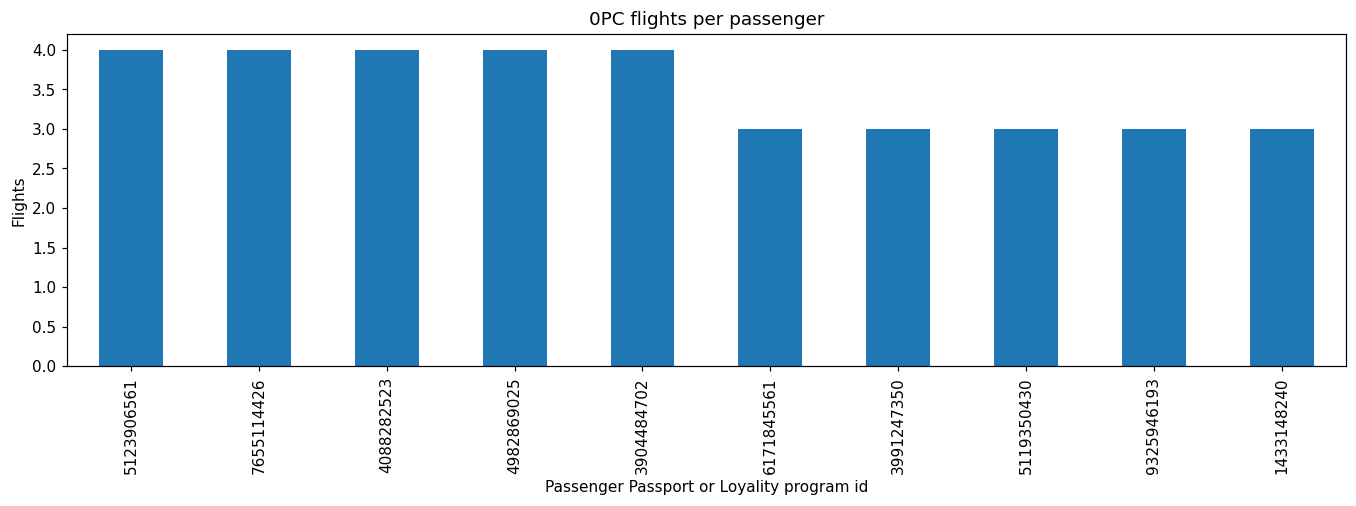

In [101]:
plt.figure(figsize=(15, 4), dpi=110)
plot = passenger_data[(passenger_data['PassengerBirthDate'].isnull()) | (passenger_data['PassengerBirthDate'] < cutoff_date) & (passenger_data['Baggage'] == '0PC') & (passenger_data['BaggageStatus'] == 'Registered')].groupby(['PassengerId'])['Baggage'].count().sort_values(ascending=False).head(10).plot(kind='bar', title='0PC flights per passenger')
plt.xlabel('Passenger Passport or Loyality program id')
plt.ylabel('Flights')
plt.show()

In [102]:
passenger_data[(passenger_data['PassengerName'] == 'ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ')].head()

,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,Baggage,CardNumber,AgentInfo,TicketNumber,BaggageStatus,PassengerBirthDate,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCountry,NickName,LoyalityProgrammStatus,CodeShare,sequence,gate,airline,comment,seat,PassengerName,BookingCode,DepartureDate,DepartureTime,FlightNumber,DepartureCity,PassengerSex,ArrivalCity,%Key_card_E00E8E5BB1D673B6,%Key_user_B75D73B83490C0F0,activities/type,activity/type,BonusProgramm,cards/type,uid,PassengerFirstName,PassengerLastName,%Key_dates_36216B4A36FC6D51,%Key_flight_C9754733A3EF9EB4,FlightStatus,TravelClass,Fare,DepartureAirport,ArrivalAirport,PassengerId
3858,2017-10-14,13:20,YES,2723331385,NaN,NaN,NaN,Kiwi.com,8257563552621546,Delayed,1982-05-19,NaN,NaN,NaN,NaN,NaN,Operated,73.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,MBSMYI,2017-10-14,12:10,SU4606,OKHA,Male,Khabarovsk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YRSTEH,OHH,KHV,2723331385
47767,2017-12-10,15:15,NO,2723331385,NaN,0PC,FB 147226191,Tickets.ru,8851588608542018,NaN,NaN,4790809.0,Russian Federation,Russian Federation,FrequentFlyer28938,Basic,False,54.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,ЕРШОВ ЭМИЛЬ РОДИОНОВИЧ,VPGXHL,2017-12-10,12:30,SU5606,Vladivostok,Male,Yuzhno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13244944.0,13277101.0,LANDED,J,JGRPXX,VVO,UUS,2723331385


### 1. У человека много перелётов, но он не пользуется бонусными программами





#### 1.2 Большая таблица


In [103]:
df_h = passenger_data[['PassengerId', 'PassengerDocument', 'CardNumber', 'BookingCode', 'DepartureDate']].copy()
df_h.head()

,PassengerId,PassengerDocument,CardNumber,BookingCode,DepartureDate
0,986865148,986865148,FB 884556993,NSJNGQ,2017-03-18
1,4396926588,4396926588,SU 183142068,VWNYGF,2017-03-18
2,78271703,78271703,NaN,WGKZTB,2017-07-29
3,595142701,595142701,NaN,POFVPI,2017-04-07
4,8280465896,8280465896,NaN,VYLCFA,2017-10-20


Посмотрим, сколько перелётов совершали пассажиры без указания карты лояльности:

In [104]:
hyp = df_h[df_h['CardNumber'].isnull()].groupby('PassengerId')['PassengerDocument'].count().sort_values(ascending=False)
hyp

PassengerId
389510918     14
5293500602    13
2294770067    12
947139628     12
5419752310    12
              ..
5134751867     1
9265636046     1
5136466990     1
9265269735     1
4453257867     1
Name: PassengerDocument, Length: 29941, dtype: int64

Для наглядности построим гистограмму распределения количества пассажиров, летающих без бонусных карт:

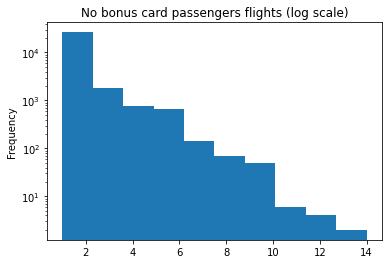

In [105]:
hyp.plot(kind='hist', logy=True, title='No bonus card passengers flights (log scale)')

Из гистограммы видно, что большинство пассажиров, имеющих бонусные карты, совершили всего 1 перелёт. Поэтому те, кто совершили больше 10 перелётов, могут считаться подозрительными.

In [106]:
hyp.loc[lambda x: x > 10]

PassengerId
389510918     14
5293500602    13
2294770067    12
947139628     12
5419752310    12
6269595357    12
4592146429    11
1028207088    11
6900856579    11
9544983593    11
7306656207    11
4088282523    11
Name: PassengerDocument, dtype: int64

Ради интереса посмотрим на самого подозрительного пассажира

In [107]:
passenger_data[passenger_data['PassengerId'] == 389510918]

,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,Baggage,CardNumber,AgentInfo,TicketNumber,BaggageStatus,PassengerBirthDate,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCountry,NickName,LoyalityProgrammStatus,CodeShare,sequence,gate,airline,comment,seat,PassengerName,BookingCode,DepartureDate,DepartureTime,FlightNumber,DepartureCity,PassengerSex,ArrivalCity,%Key_card_E00E8E5BB1D673B6,%Key_user_B75D73B83490C0F0,activities/type,activity/type,BonusProgramm,cards/type,uid,PassengerFirstName,PassengerLastName,%Key_dates_36216B4A36FC6D51,%Key_flight_C9754733A3EF9EB4,FlightStatus,TravelClass,Fare,DepartureAirport,ArrivalAirport,PassengerId
6689,2017-09-02,19:05,NO,389510918,NaN,2PC,NaN,Aeroflot,9506524751747900,None,1993-03-28,NaN,NaN,NaN,NaN,NaN,Own,63.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,КУЛИКОВА МИЛЕНА АДЕЛЬЕВНА,AMPGVB,2017-09-02,17:40,SU1354,MOSCOW,Female,Voronezh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YGRPLV,SVO,VOZ,389510918
20633,2017-04-14,00:35,NO,389510918,NaN,NaN,NaN,Aerobilet,6781337718538141,NaN,1993-03-28,NaN,NaN,NaN,NaN,NaN,NaN,89.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,КУЛИКОВА МИЛЕНА АДЕЛЬЕВНА,HDAWBH,2017-04-13,22:00,SU1130,MOSCOW,Female,SOCHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YGRPYU,SVO,AER,389510918
22477,2017-06-19,16:15,NO,389510918,NaN,0PC,NaN,Go2See,1237524546985634,NaN,1993-03-28,NaN,NaN,NaN,NaN,NaN,NaN,100.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,КУЛИКОВА МИЛЕНА АДЕЛЬЕВНА,BAVUSP,2017-06-19,14:45,SU1192,MOSCOW,Female,KAZAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YSTNJC,SVO,KZN,389510918
27454,2017-09-23,19:25,NO,389510918,NaN,1PC,NaN,Aeroflot,8779242234439776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,КУЛИКОВА МИЛЕНА АДЕЛЬЕВНА,OJXJAU,2017-09-23,14:55,SU1534,MOSCOW,Female,CHELYABINSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YGRPAR,SVO,CEK,389510918
30303,2017-06-13,04:30,NO,389510918,NaN,NaN,NaN,Aerobilet,2907038843685369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,КУЛИКОВА МИЛЕНА АДЕЛЬЕВНА,JDWIQW,2017-06-12,19:45,SU1480,MOSCOW,Female,KRASNOYARSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YFLXNI,SVO,KJA,389510918
31056,2017-09-15,07:20,NO,389510918,NaN,1PC,NaN,Go2See,8057029110437854,Delayed,1993-03-28,NaN,NaN,NaN,NaN,NaN,Own,22.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,КУЛИКОВА МИЛЕНА АДЕЛЬЕВНА,NDUILJ,2017-09-15,06:05,SU1353,VORONEZH,Female,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,AFLXBU,VOZ,SVO,389510918
37611,2017-07-13,12:30,NO,389510918,NaN,NaN,NaN,OZON.travel,776313373612151,Registered,1993-03-28,NaN,NaN,NaN,NaN,NaN,Own,63.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,КУЛИКОВА МИЛЕНА АДЕЛЬЕВНА,FHQUEO,2017-07-13,10:50,SU1277,KAZAN,Female,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YFLXHC,KZN,SVO,389510918
39217,2017-03-18,15:25,NO,389510918,NaN,0PC,NaN,Go2See,4691431191875753,Delayed,1993-03-28,NaN,NaN,NaN,NaN,NaN,Own,3.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,КУЛИКОВА МИЛЕНА АДЕЛЬЕВНА,WBKPIO,2017-03-18,14:30,SU1501,TYUMEN,Female,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YRSTPC,TJM,SVO,389510918
40081,2017-08-27,07:40,NO,389510918,NaN,NaN,NaN,Go2See,2034711894099603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,КУЛИКОВА МИЛЕНА АДЕЛЬЕВНА,GHRRVA,2017-08-27,07:30,SU1395,PERM,Female,MOSCOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YRSTGU,PEE,SVO,389510918
42020,2017-05-04,19:50,NO,389510918,NaN,NaN,NaN,Aerobilet,2917215479265403,

Наконец, хорошо бы проверить, может ли данная гипотеза оправдываться статистическими методами. Для этого сравним две выборки: число перелётов пассажиров с указанным номером карты лояльности и без него при помощи **критерия Манна-Уитни** со следующими гипотезами
- H0: число перелётов не связано с указанием номера карты лояльности (обе выборки принадлежат одной генеральной совокупности)
- H1: число перелётов связано с указанием номера карты лояльности

In [108]:
hyp_no_card = hyp.copy()
hyp_card = df_h[df_h['CardNumber'].notnull()].groupby('PassengerId')['PassengerDocument'].count().sort_values(ascending=False)

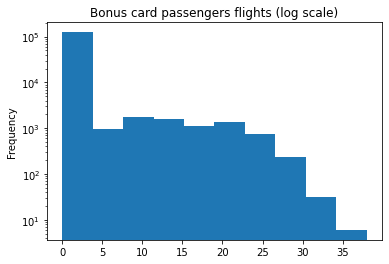

In [109]:
hyp_card.plot(kind='hist', logy=True, title='Bonus card passengers flights (log scale)')

На гистограмме видно, что с картой лояльности люди летают гораздо чаще (есть относительно заметные частоты в районе 10-15 и 20 перелётов)

In [110]:
from scipy.stats import mannwhitneyu

mannwhitneyu(hyp_card, hyp_no_card)

MannwhitneyuResult(statistic=238858865.5, pvalue=0.0)

Таким образом, критерий Манна-Уитни даёт нам достаточно оснований отклонить нулевую гипотезу об отсутствии различий между количеством перелётов пассажиров, использующих карту лояльности, от тех, кто её не использует (p << 0.05). 

### 2. Множество кратковременных остановок

Установим число близких по времени перелетов и максимальную разницу между ними в днях:

In [111]:
number_of_flights = 5
days_count_border = 30

1. Найти тех пассажиров, у которых было более number_of_flights полетов 

In [112]:
print(len(passenger_data['PassengerId'].unique()))
many_flights = passenger_data[passenger_data.groupby(['PassengerName','PassengerId']).FlightNumber.transform('size') > number_of_flights][['PassengerName','PassengerId', 'DepartureDate']]
many_flights.head()

161328


,PassengerName,PassengerId,DepartureDate
5,ЛУКЬЯНОВ ИГОРЬ РАМИЛЕВИЧ,5298581934,2017-07-11
8,ФОКИН ВИТАЛИЙ ДМИТРИЕВИЧ,3521138764,2017-11-18
12,АЛЕШИН АНАТОЛИЙ РОСТИСЛАВОВИЧ,6391817472,2017-06-10
84,АНДРЕЕВА ДАРЬЯ СВЯТОСЛАВОВНА,5317147472,2017-12-14
102,БОРИСОВ САМИР РОСТИСЛАВОВИЧ,4104637033,2017-05-20


Вывести паспорта и имена пассажиров, летавших более number_of_flights раз с интервалами между полетами менее days_count_border

200
Total suspicious passengers count: 7


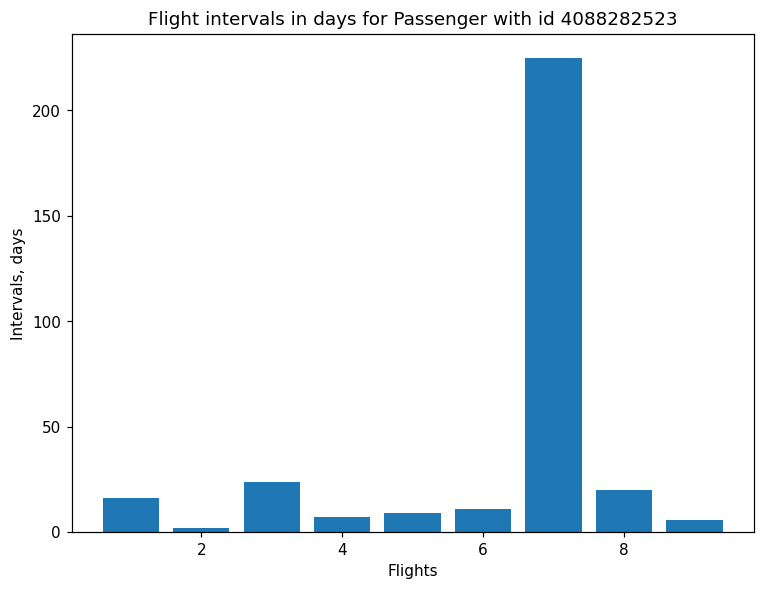

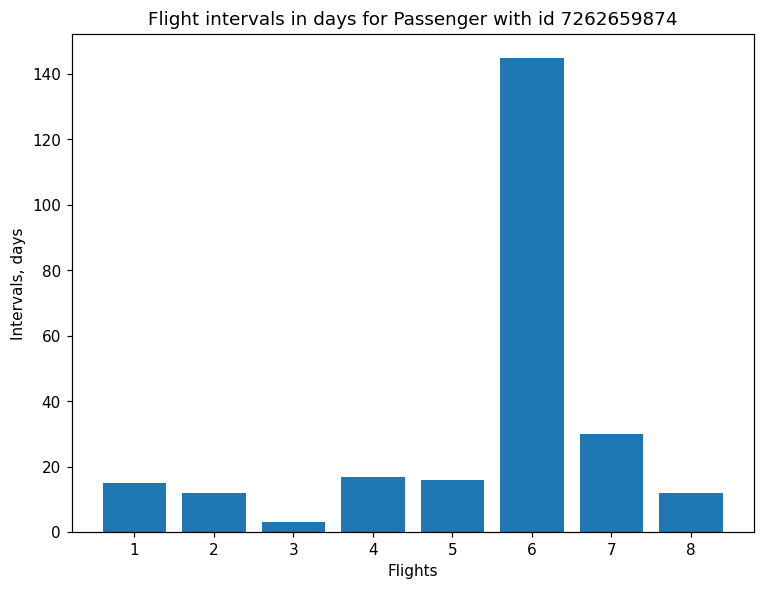

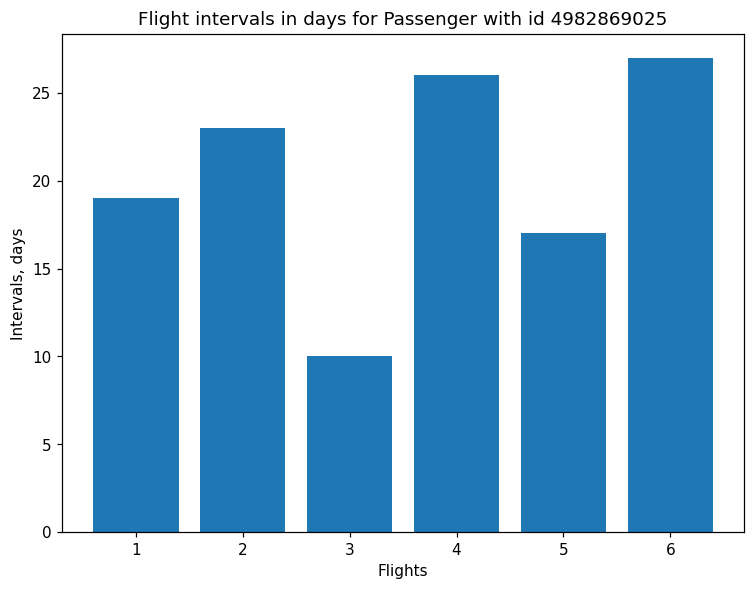

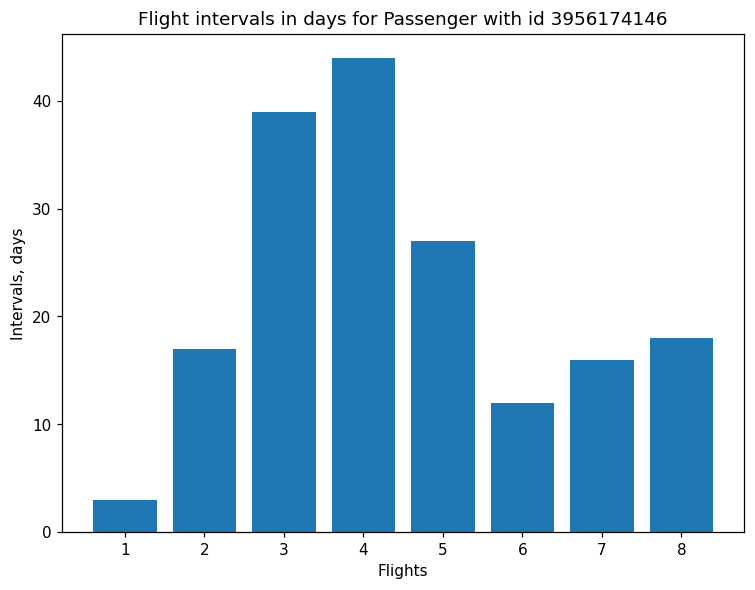

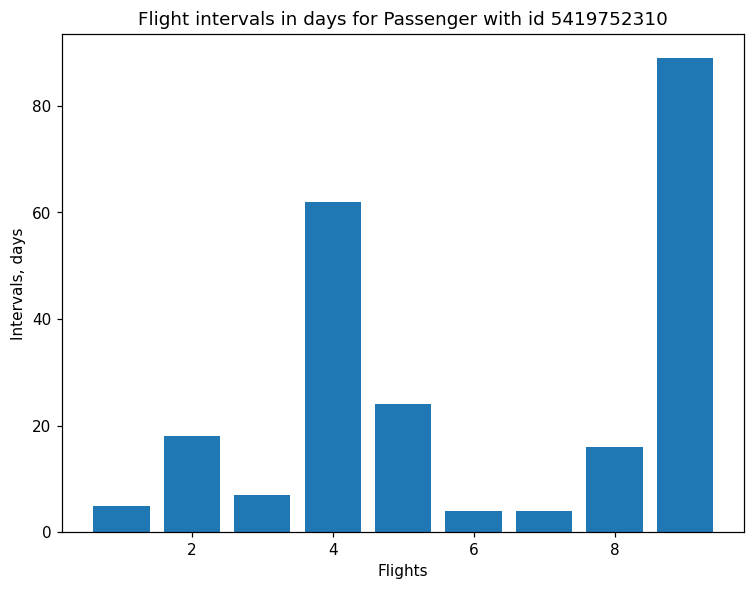

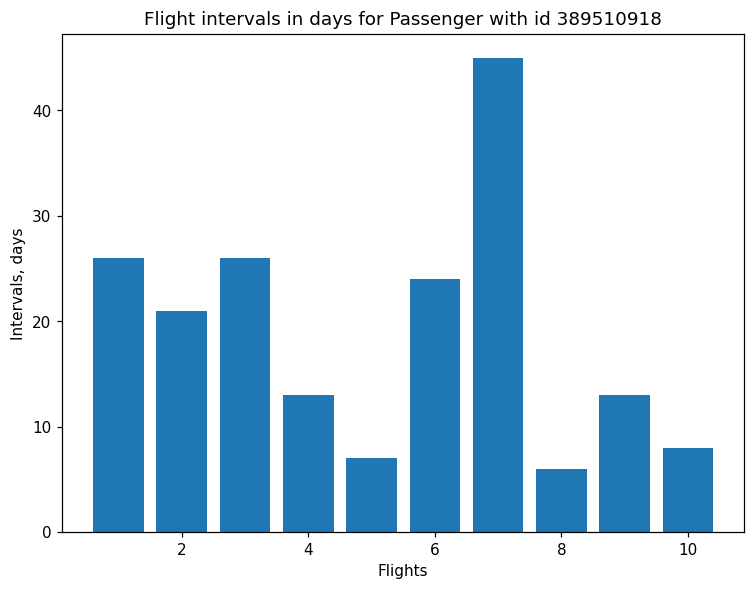

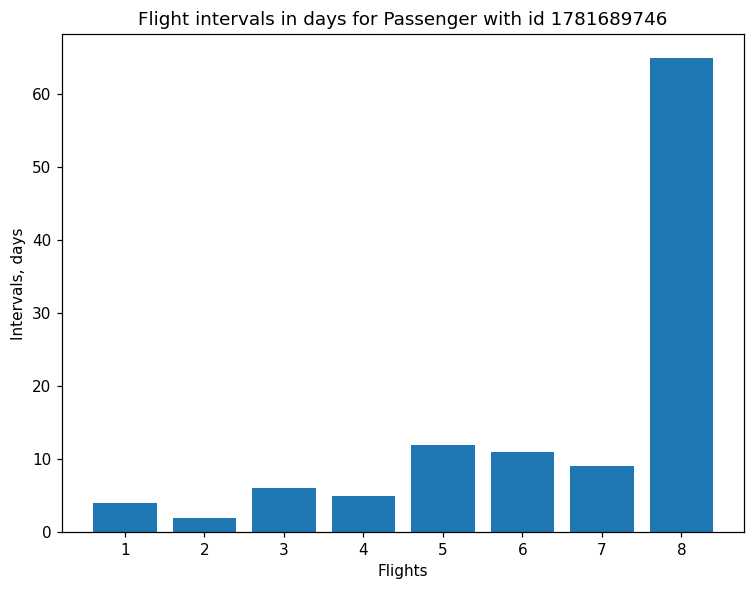

In [113]:
suspicious_count = 0
print(len(many_flights['PassengerId'].unique()))
border = pd.Timedelta(days = days_count_border)
for id in many_flights['PassengerId'].unique():
  ps_dates = many_flights[many_flights.PassengerId == id].DepartureDate.apply(pd.to_datetime)
  sorted_dates = ps_dates.sort_values(ascending=True)
  differences = sorted_dates.diff()
  # differences.iloc[0] = sorted_dates.iloc[0]
  diff_cut = differences.loc[lambda x: x < border]
  if diff_cut.count() > number_of_flights:
    suspicious_count += 1
    # print(f'Passenger id (Passport of Loyalty Program): {id}; appeared as:')
    # print(many_flights[many_flights['PassengerId'] == id].PassengerName.unique())
    # print('Flights: 1st flight date and differences:')
    # print(differences)
    plt.figure(figsize=(8, 6), dpi=110)
    plt.title(f'Flight intervals in days for Passenger with id {id}')
    plt.xlabel('Flights')
    plt.ylabel('Intervals, days')
    plt.bar([_ for _ in range(len(differences))], differences.astype('timedelta64[D]'))
print(f'Total suspicious passengers count: {suspicious_count}')

In [114]:
gc.collect()

20251

### 3. Много полетов в одно и то же место + сортировка по разным городам
---

Идея для оценки "много" для количества полетов следующая. Посчитаем количество полетов в один и тот же город по каждому пассажиру, а затем для данных значений рассчитаем *z-score*. Выбросы в сторону больших значений будут считаться подозрительными.


In [115]:
mpl.rcParams['figure.figsize'] = (20, 12)

#### Шаг 1
Подсчет количества полетов в один и тот же город по пассажирам

Группируем по пассажирам и подсчитываем количества поездок в города

In [116]:
df_passengers_destination = passenger_data[['PassengerDocument', 'ArrivalCity']] \
    .dropna()                                                                    \
    .sort_values('PassengerDocument')                                            \

processed = df_passengers_destination.groupby('PassengerDocument')               \
    .agg('count')

In [117]:
processed.head()

,ArrivalCity
PassengerDocument,
209920,4
288744,1
342340,1
489067,1
554217,1


In [118]:
processed.describe()

,ArrivalCity
count,36290.000000
mean,1.473960
std,1.047021
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


#### Шаг 2
Исследование распределения поездок и расчет z-статистики для количества полетов в одинаковые города

z-статистика рассчитывается по следующей формуле:
$$
z = \frac{x-\bar{x}}{s_x}, где\ \bar{x}\ - выборочное\ математическое\ ожидание, s_x\ - выборочное\ стандартное\ отклонение
$$

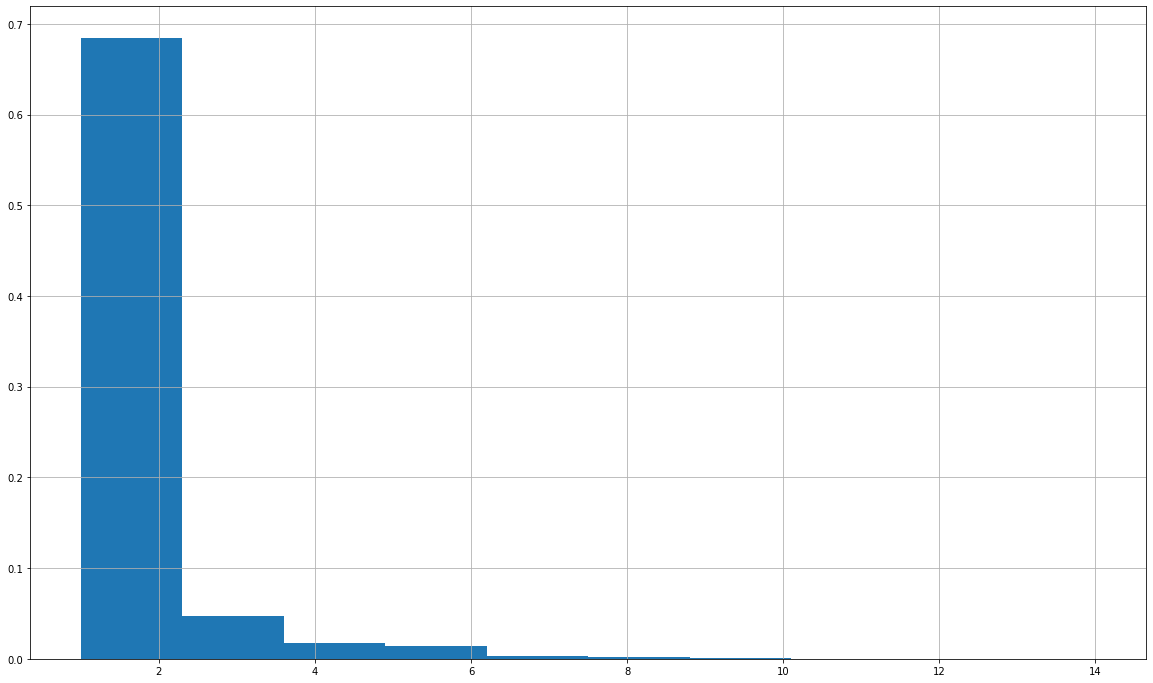

In [119]:
plt.hist(processed['ArrivalCity'], density=True)
plt.grid()

In [120]:
processed['zscore'] = ((processed['ArrivalCity'] - processed['ArrivalCity'].mean()) / processed['ArrivalCity'].std(ddof=0)).to_frame()

#### Шаг 3

Вывод результатов. 

- Первая таблица: подозрительные пассажиры - паспорт и кол-во поездок в один и тот же город
- Вторая таблица: уникальные города по пассажиров

In [121]:
processed[(processed['zscore'] > 3)].sort_values('zscore').drop('zscore', axis=1)

,ArrivalCity
PassengerDocument,
22432400,5
7389514426,5
3957918723,5
3950889653,5
7426948016,5
...,...
5419752310,12
947139628,12
6269595357,12


In [122]:
df_passengers_destination.drop_duplicates() \
    .groupby('PassengerDocument')           \
    .agg('count')                           \
    .sort_values('ArrivalCity')

,ArrivalCity
PassengerDocument,
4428870446,1
5319188359,1
5318979926,1
5318065224,1
5317651489,1
...,...
9544983593,9
6928394546,9
2560265581,9


### 4. Люди, много летающие и берущие билеты в разных агентствах
---

#### Шаг 1

Подсчет количества уникальных агентств для каждого пассажира и количества полетов

In [123]:
processed = passenger_data[['PassengerDocument', 'AgentInfo', 'ArrivalAirport']].dropna()
agent_info, arrival_airport = processed.drop('ArrivalAirport', axis=1).drop_duplicates(), processed.drop('AgentInfo', axis=1)

In [124]:
agent_info = agent_info.groupby('PassengerDocument').count().rename({'AgentInfo': 'DifferentAgents'}, axis=1)
arrival_airport = arrival_airport.groupby('PassengerDocument').count().rename({'ArrivalAirport': 'Flights'}, axis=1)

#### Шаг 2

Расчет z-статистики для количества турагентств и полетов, отбор пассажиров с высокими значениями статистик по обоим критериям

In [125]:
agent_info['zscore'] = ((agent_info['DifferentAgents'] - agent_info['DifferentAgents'].mean()) / agent_info['DifferentAgents'].std(ddof=0))
arrival_airport['zscore'] = ((arrival_airport['Flights'] - arrival_airport['Flights'].mean()) / arrival_airport['Flights'].std(ddof=0))

In [126]:
selected_agent_info = agent_info[agent_info['zscore'] > 3].drop(['zscore'], axis=1)
selected_arrival_airport = arrival_airport[arrival_airport['zscore'] > 3].drop(['zscore'], axis=1)

In [127]:
selected_passengers = selected_agent_info.join(selected_arrival_airport, how='inner')

#### Шаг 3

Есть такая история. Вот, к примеру, пассажир летал 300 раз, заказывая билеты в 6 агентствах. Это нормальная ситуация, но по значению статистик это может выбиваться, поэтому отсеку подобные случаи по малому соотношению агентств к полетам:
$$
\frac{кол-во\ агентств}{кол-во\ полетов} > 0.4
$$

In [128]:
RATIO_THRESCHOLD = 0.4

In [129]:
selected_passengers['ratio'] = selected_passengers['DifferentAgents'] / selected_passengers['Flights']

In [130]:
selected_passengers = selected_passengers[selected_passengers['ratio'] > RATIO_THRESCHOLD].drop('ratio', axis=1)

#### Шаг 4

Вывожу данные, отсортированные по количеству различных агентств и количеству полетов

In [131]:
selected_passengers.sort_values('DifferentAgents')

,DifferentAgents,Flights
PassengerDocument,,
26872853,4,4
6495157165,4,4
6493769235,4,4
6430183186,4,4
6409768539,4,4
...,...,...
2828506318,7,7
3956174146,7,9
9816026611,7,8


In [132]:
selected_passengers.sort_values('Flights')

,DifferentAgents,Flights
PassengerDocument,,
26872853,4,4
5836956509,4,4
5825007051,4,4
5822916791,4,4
5802813546,4,4
...,...,...
7306656207,5,9
4088282523,6,9
7655114426,7,9


## 5. Подозрительные совпадения маршрутов у нескольких людей 

Люди, покупающие билеты на одни и те же рейсы очень часто. 

Каждый рейс идентифицируется датой отправления (DepartureDate) и кодом (FlightNumber).

Каждому пассажиру поставим в соответствие множество рейсов, и будем искать тех, у кого эти множества сильно похожи. Похожесть множеств можно оценить несколькими метриками
- коэффициентом Жаккара (Jaccard index)

$$ J(A,B) = {{|A \cap B|}\over{|A \cup B|}} = {{|A \cap B|}\over{|A| + |B| - |A \cap B|}}$$

- коэффициентом Сёренсена (Sørensen–Dice coefficient)

$${\displaystyle DSC={\frac {2|X\cap Y|}{|X|+|Y|}}}$$

- overlap

$${\displaystyle \operatorname {overlap} (X,Y)={\frac {|X\cap Y|}{\min(|X|,|Y|)}}}$$

Данная гипотеза применима только для пассажиров с достаточно большим количеством рейсов

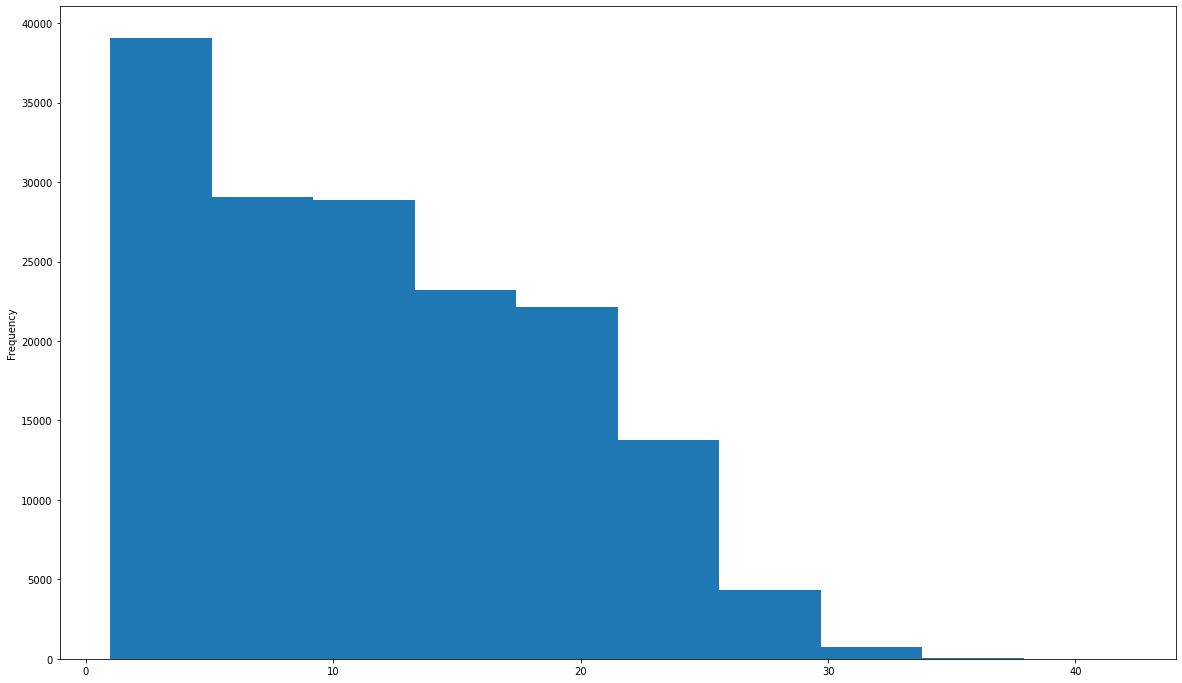

In [133]:
pax_flights_count = passenger_data.groupby('PassengerId')['PassengerId'].count()
pax_flights_count.plot(kind='hist')

Пусть "достаточно большое" количество рейсов равно 15. Тогда построим для каждого часто летающего пассажира его множество рейсов:

In [134]:
hyp5_freq_flyers = passenger_data.groupby('PassengerId')['PassengerId'].count().loc[lambda x: x >= 25]
hyp5_freq_flyers

PassengerId
5029877         28
12250785        27
18956181        26
26950120        28
31641114        25
                ..
SU 997978954    25
SU 99807517     28
SU 998802122    25
SU 99914946     31
SU 999952967    25
Name: PassengerId, Length: 7564, dtype: int64

In [135]:
hyp5_freq_flyers_set = set(hyp5_freq_flyers.index)

In [136]:
hyp5_pd = passenger_data[passenger_data['PassengerId'].isin(hyp5_freq_flyers_set)]
hyp5_pd['FlightId'] = hyp5_pd['DepartureDate'] + ' ' + hyp5_pd['FlightNumber']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
gc.collect()

3400

In [138]:
hyp5_pd.head(3)

,ArrivalDate,ArrivalTime,CodeSh,PassengerDocument,Seat,Baggage,CardNumber,AgentInfo,TicketNumber,BaggageStatus,PassengerBirthDate,%Key_Forum_x0020_Profiles_187C458A6AADEC83,ArrivalCountry,DepartureCountry,NickName,LoyalityProgrammStatus,CodeShare,sequence,gate,airline,comment,seat,PassengerName,BookingCode,DepartureDate,DepartureTime,FlightNumber,DepartureCity,PassengerSex,ArrivalCity,%Key_card_E00E8E5BB1D673B6,%Key_user_B75D73B83490C0F0,activities/type,activity/type,BonusProgramm,cards/type,uid,PassengerFirstName,PassengerLastName,%Key_dates_36216B4A36FC6D51,%Key_flight_C9754733A3EF9EB4,FlightStatus,TravelClass,Fare,DepartureAirport,ArrivalAirport,PassengerId,FlightId
46,2017-01-30,14:25,NO,793670652,NaN,1PC,SU 91043895,Tickets.ru,7480803163822406,NaN,1993-07-04,5944045.0,Russian Federation,Russian Federation,FrequentFlyer35887,Elite,False,40.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,ЗОРИНА ИРИНА ФИЛИППОВНА,XIUIVN,2017-01-30,14:15,SU1439,Ufa,Female,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IRINA,ZORINA,753784.0,775993.0,LANDED,A,AGRPNL,UFA,SVO,793670652,2017-01-30 SU1439
73,2017-02-02,13:55,NO,3014761863,NaN,1PC,KE 593935018,NaN,4934319916064098,NaN,1980-04-20,8803793.0,Russian Federation,Russian Federation,FrequentFlyer53099,Elite,False,51.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,БЫЧКОВ АЛЕКСЕЙ ИГНАТОВИЧ,OYZZOQ,2017-02-02,12:35,SU1371,Belgorod,Male,Moscow,2098261.0,2098254.0,Airlines,Flight,Korean Air SKYPASS,Airlines,967509594.0,ALEXEY,BYCHKOV,855737.0,881306.0,LANDED,Y,YFLXHC,EGO,SVO,3014761863,2017-02-02 SU1371
83,2017-04-27,13:20,NO,4129767657,NaN,0PC,NaN,OZON.travel,3217705143840164,NaN,1997-04-04,NaN,NaN,NaN,NaN,NaN,NaN,15.0,GATE,Operated by Some Other Airline,Boarding is ended 20 minutes before departure ...,SEAT,СИЗОВ ЯН САМИРОВИЧ,WXFDZT,2017-04-27,07:00,SU1640,MOSCOW,Male,OMSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,YFLXTX,SVO,OMS,4129767657,2017-04-27 SU1640


In [139]:
hyp5_pax_sets = hyp5_pd.groupby('PassengerId')['FlightId'].agg(lambda x: set(x))

In [140]:
gc.collect()

50

In [141]:
hyp5_pax_sets

PassengerId
5029877         {2017-11-12 KE5821, 2017-07-17 CZ6666, 2017-03...
12250785        {2017-08-18 DL4048, 2017-11-11 DL2253, 2017-03...
18956181        {2017-09-30 DL5453, 2017-10-04 DL2440, 2017-05...
26950120        {2017-07-02 DL330, 2017-10-13 DL3541, 2017-01-...
31641114        {2017-03-03 SU1279, 2017-10-17 DL1318, 2017-04...
                                      ...                        
SU 997978954    {2017-02-18 KL1293, 2017-10-29 DL5853, 2017-09...
SU 99807517     {2017-02-08 KE5757, 2017-07-11 CZ3454, 2017-09...
SU 998802122    {2017-02-10 SU1058, 2017-07-09 SU1432, 2017-09...
SU 99914946     {2017-12-10 SV1452, 2017-07-11 GA626, 2017-09-...
SU 999952967    {2017-12-04 DL2091, 2017-12-13 DL3919, 2017-11...
Name: FlightId, Length: 7564, dtype: object

Построить матрицу похожести множеств средствами Pandas не удалось: но может быть получится вручную?

In [142]:
type(hyp5_pax_sets)

pandas.core.series.Series

In [143]:
hyp5_pax_sets.shape

(7564,)

In [144]:
def similarities(data, fun, threshold):
  res = dict()

  for i, this in enumerate(data):
    for j, other in enumerate(data):
      if i == j:
        continue
      sim = fun(this, other)
      if sim > threshold:
        res[frozenset({i, j})] = sim
  return res

In [145]:
def jaccard_similarity(a: set, b: set) -> float:
  return len(a & b) / len(a | b)

In [146]:
jaccard_similarity({1, 2, 3}, {3, 4, 5})

0.2

In [147]:
r = similarities(hyp5_pax_sets, jaccard_similarity, 0)

In [148]:
sorted(list(r.items()), key=lambda x: x[1], reverse=True)[:10]

[(frozenset({340, 3117}), 0.045454545454545456),
 (frozenset({467, 4458}), 0.044444444444444446),
 (frozenset({373, 5629}), 0.041666666666666664),
 (frozenset({2155, 6249}), 0.041666666666666664),
 (frozenset({5155, 7241}), 0.041666666666666664),
 (frozenset({280, 457}), 0.04081632653061224),
 (frozenset({1096, 3593}), 0.04081632653061224),
 (frozenset({1551, 6500}), 0.04081632653061224),
 (frozenset({751, 2216}), 0.04),
 (frozenset({5725, 6276}), 0.04)]

Text(0.5, 0, 'Jaccard index')

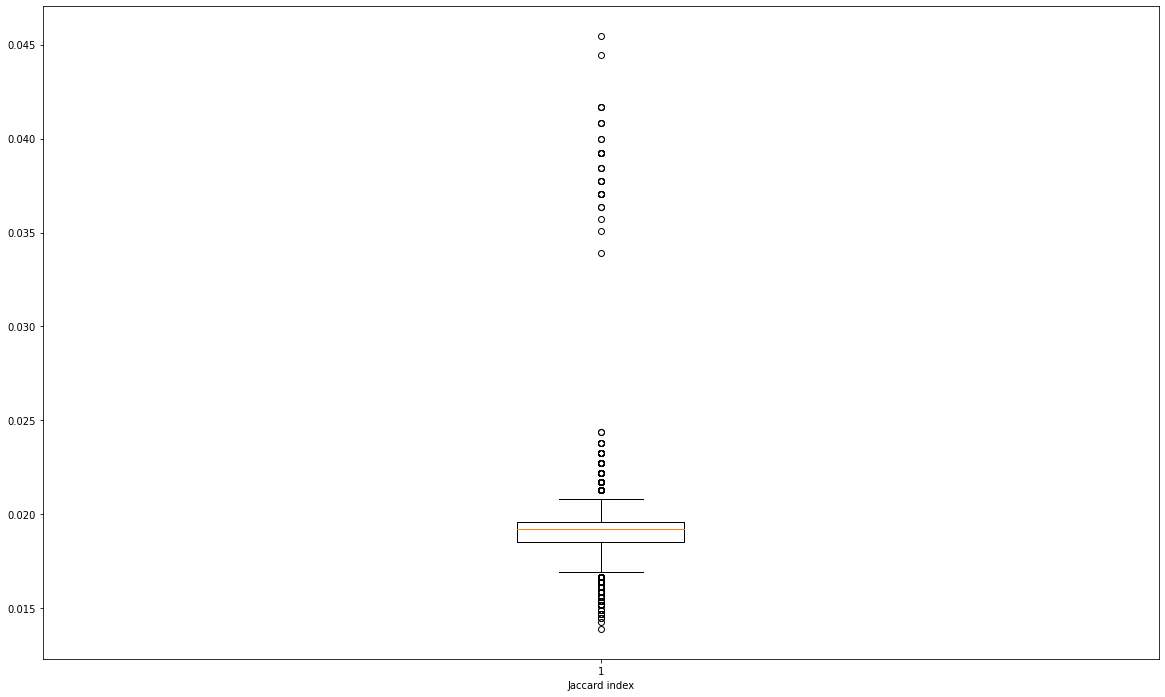

In [149]:
plt.boxplot(list(r.values()))
plt.xlabel('Jaccard index')

In [150]:
list(map(lambda x: x[0], (filter(lambda x: x[1] > 0.03, sorted(list(r.items()), key=lambda x: x[1], reverse=True)))))

[frozenset({340, 3117}),
 frozenset({467, 4458}),
 frozenset({373, 5629}),
 frozenset({2155, 6249}),
 frozenset({5155, 7241}),
 frozenset({280, 457}),
 frozenset({1096, 3593}),
 frozenset({1551, 6500}),
 frozenset({751, 2216}),
 frozenset({5725, 6276}),
 frozenset({306, 853}),
 frozenset({325, 7189}),
 frozenset({812, 6865}),
 frozenset({3019, 4587}),
 frozenset({4465, 6410}),
 frozenset({4822, 6247}),
 frozenset({2216, 3985}),
 frozenset({2789, 7320}),
 frozenset({4601, 5566}),
 frozenset({2230, 4005}),
 frozenset({2438, 3508}),
 frozenset({4066, 6743}),
 frozenset({5891, 7528}),
 frozenset({1218, 3985}),
 frozenset({2173, 3878}),
 frozenset({3086, 6620}),
 frozenset({3375, 5492}),
 frozenset({5816, 7467}),
 frozenset({482, 6573}),
 frozenset({3847, 4106}),
 frozenset({3676, 6533}),
 frozenset({4352, 6863}),
 frozenset({3326, 6773})]

In [151]:
print('Passenger 1\tPassenger 2\tJaccard coeff')
for ((i, j), dist) in list(filter(lambda x: x[1] > 0.03, sorted(list(r.items()), key=lambda x: x[1], reverse=True))):
  print(f'{hyp5_pax_sets.index[i]}\t{hyp5_pax_sets.index[j]}\t {"{:10.4f}".format(dist)}')

Passenger 1	Passenger 2	Jaccard coeff
4941326709	FB 462568905	     0.0455
KE 249309739	6829870216	     0.0444
KE 844512981	5383925256	     0.0417
SU 275725248	DT 875843708	     0.0417
SU 815996777	KE 600252014	     0.0417
4050828748	6614477368	     0.0408
DT 340826737	FB 703257046	     0.0408
SU 420555099	DT 57583474	     0.0408
DT 90720619	DT 153205404	     0.0400
SU 293973054	KE 897393283	     0.0400
4529837329	DT 203859518	     0.0392
SU 792485160	4721757053	     0.0392
SU 629041532	DT 182697208	     0.0392
FB 419254393	KE 319036989	     0.0392
KE 253102240	SU 373146640	     0.0392
KE 4297335	SU 275292912	     0.0392
DT 90720619	FB 907696634	     0.0385
SU 863269279	FB 309345136	     0.0385
KE 324361780	KE 811674062	     0.0385
FB 918976573	DT 912171989	     0.0377
FB 657033741	FB 128902907	     0.0377
FB 945581033	SU 566702352	     0.0377
SU 983010169	KE 989085833	     0.0377
FB 907696634	DT 403363582	     0.0370
DT 882262279	FB 854374096	     0.0370
SU 48973572	FB 447753489	     0

Дополнительная информация по гипотезам, обработке файлов и ходу работы содержится в прикрепленных файлах.

Благодарим за внимание!


